In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer_support_tickets.csv
/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/CDR-Call-Details.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 100)

# EDA 

#### Don't forget to change the dataset path when loading it in (read_csv() function's argument)

In [3]:
df = pd.read_csv('/kaggle/input/CDR-Call-Details.csv') 

## Understanding the data

In [4]:
df.shape

(101174, 17)

So there's 101174 rows, 17 columns/features

In [5]:
df.columns

Index(['Phone Number', 'Account Length', 'VMail Message', 'Day Mins',
       'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge',
       'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

There's 17 different columns

In [6]:
# replacing the spaces with underscores for code purposes i suppose
df.columns = df.columns.str.replace(' ', '_')

df.columns

Index(['Phone_Number', 'Account_Length', 'VMail_Message', 'Day_Mins',
       'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge',
       'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls',
       'Intl_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [7]:
df

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
0          382-4657             128             25     265.1        110   
1          371-7191             107             26     161.6        123   
2          358-1921             137              0     243.4        114   
3          375-9999              84              0     299.4         71   
4          330-6626              75              0     166.7        113   
...             ...             ...            ...       ...        ...   
101169     789-9756             222              0     228.2         60   
101170     798-5885              88              0     282.2        222   
101171     798-5798              22              0     222.2         62   
101172     999-9897             228              0     222.0         99   
101173     786-7589             228              0     226.2         98   

        Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0            45.07     197.4         99       16.78       244.7           91   
1            27.47     195.5        103       16.62       254.4          103   
2            41.38     121.2        110       10.30       162.6          104   
3            50.90      61.9         88        5.26       196.9           89   
4            28.34     148.3        122       12.61       186.9          121   
...            ...       ...        ...         ...         ...          ...   
101169       22.82     229.8        289       28.26       222.8          222   
101170       82.88     208.8        220       22.82       282.2          200   
101171       88.66     228.0        228       22.08        62.2          209   
101172       88.08     220.2         80       22.92       282.9           28   
101173       86.28     288.2        208       28.28       800.0          228   

        Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  \
0              11.01       10.0           3         2.70               1   
1              11.45       13.7           3         3.70               1   
2               7.32       12.2           5         3.29               0   
3               8.86        6.6           7         1.78               2   
4               8.41       10.1           3         2.73               3   
...              ...        ...         ...          ...             ...   
101169          2.28        6.2           2         2.62               2   
101170         20.68        9.8           8         2.82               8   
101171          2.26        2.8           6         2.22               2   
101172         20.22        2.2           8         0.82               0   
101173         28.80       20.0           8         2.20               2   

        Churn  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
101169  False  
101170  False  
101171  False  
101172  False  
101173  False  

[101174 rows x 17 columns]

In [8]:
#potential feature engg

# df['day_avg'] = df['Day Mins'] / df['Day Calls']
# df['day_avg']

In [9]:
df.head()

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
0     382-4657             128             25     265.1        110   
1     371-7191             107             26     161.6        123   
2     358-1921             137              0     243.4        114   
3     375-9999              84              0     299.4         71   
4     330-6626              75              0     166.7        113   

   Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90      61.9         88        5.26       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
0         11.01       10.0           3         2.70               1  False  
1         11.45       13.7           3         3.70               1  False  
2          7.32       12.2           5         3.29               0  False  
3          8.86        6.6           7         1.78               2  False  
4          8.41       10.1           3         2.73               3  False

In [10]:
df.tail()

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
101169     789-9756             222              0     228.2         60   
101170     798-5885              88              0     282.2        222   
101171     798-5798              22              0     222.2         62   
101172     999-9897             228              0     222.0         99   
101173     786-7589             228              0     226.2         98   

        Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
101169       22.82     229.8        289       28.26       222.8          222   
101170       82.88     208.8        220       22.82       282.2          200   
101171       88.66     228.0        228       22.08        62.2          209   
101172       88.08     220.2         80       22.92       282.9           28   
101173       86.28     288.2        208       28.28       800.0          228   

        Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  \
101169          2.28        6.2           2         2.62               2   
101170         20.68        9.8           8         2.82               8   
101171          2.26        2.8           6         2.22               2   
101172         20.22        2.2           8         0.82               0   
101173         28.80       20.0           8         2.20               2   

        Churn  
101169  False  
101170  False  
101171  False  
101172  False  
101173  False

Viewed the head and tail to get a look at the data present
## Assumptions
### assuming Account_Length is measured in days
### assuming charges are measured in USD ($)
(because there's no dataset discription provided)

In [11]:
print(df.info()) #objects are strings essentially

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone_Number    101174 non-null  object 
 1   Account_Length  101174 non-null  int64  
 2   VMail_Message   101174 non-null  int64  
 3   Day_Mins        101174 non-null  float64
 4   Day_Calls       101174 non-null  int64  
 5   Day_Charge      101174 non-null  float64
 6   Eve_Mins        101174 non-null  float64
 7   Eve_Calls       101174 non-null  int64  
 8   Eve_Charge      101174 non-null  float64
 9   Night_Mins      101174 non-null  float64
 10  Night_Calls     101174 non-null  int64  
 11  Night_Charge    101174 non-null  float64
 12  Intl_Mins       101174 non-null  float64
 13  Intl_Calls      101174 non-null  int64  
 14  Intl_Charge     101174 non-null  float64
 15  CustServ_Calls  101174 non-null  int64  
 16  Churn           101174 non-null  bool   
dtypes: bool(1)

There's 15 numbers - 8 float, 7 int columns then 1 bool and 1 object column as depicted above

In [12]:
print(df.describe())

       Account_Length  VMail_Message       Day_Mins      Day_Calls  \
count   101174.000000  101174.000000  101174.000000  101174.000000   
mean       323.597149      18.142645     587.080798     267.207613   
std       1418.073651      75.826932    2193.094319     947.963370   
min          1.000000       0.000000       0.000000       0.000000   
25%         69.000000       0.000000     222.300000      88.000000   
50%        202.000000       0.000000     262.200000     202.000000   
75%        240.000000      22.000000     326.275000     224.000000   
max      21111.000000    1111.000000  111111.110000   21111.000000   

          Day_Charge       Eve_Mins      Eve_Calls     Eve_Charge  \
count  101174.000000  101174.000000  101174.000000  101174.000000   
mean       64.958811     655.512526     267.166930      34.358125   
std       133.515808    2473.445436     932.914437      36.248577   
min         0.000000       0.000000       0.000000       0.000000   
25%        23.920000    

#### Inference
- Account_Length has a mix value of 21111 which is highly unlikely (21111 / 365 = 57 ish years which is highly unlikely)
- Similar to account length other fearues also have questionable maximum values indicating clear presence of outliers skewing the dataset essentially
- Every column has mean << 75th percentile so it's very much right skewed
- Higher values of std suggest wider range of values
- Vmail & CustServ features & Intl(mins, call, charge) features aside rest needs to be addressed of outliers because of impossible values
- 50th percentile 

In [13]:
#specifying the numeric columns
numeric_cols = ['Account_Length','Day_Mins','Day_Calls','Day_Charge', 'Eve_Mins', 'Eve_Calls','Eve_Charge', 'Night_Mins','Night_Calls','Night_Charge','Intl_Mins','Intl_Calls','Intl_Charge', 'VMail_Message']


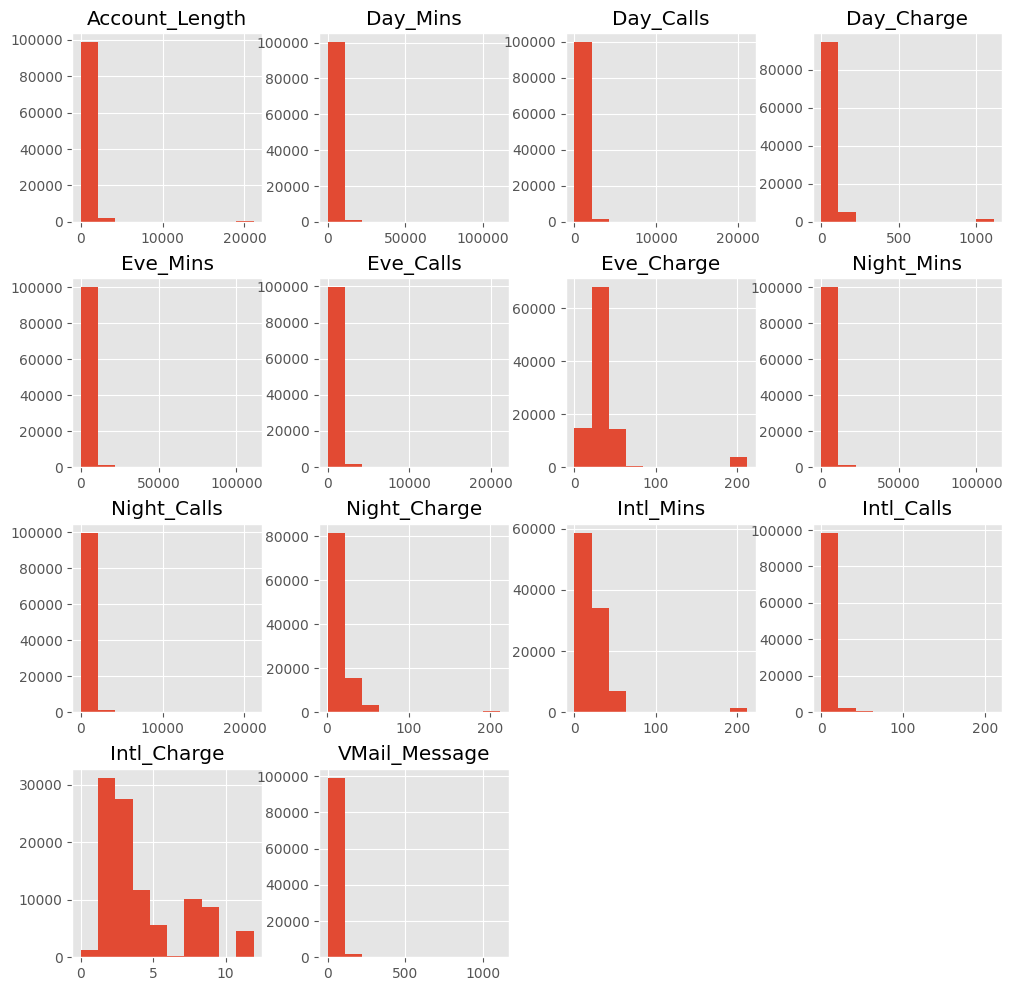

In [14]:
# histograms
df[numeric_cols].hist(figsize=(12, 12))
plt.show()

- histogram clearly indicating skewness 

### dropping the churn column

In [15]:
# df = df.drop(['Churn'], axis=1).copy()

- From what I've seen account_length seems to indicate the duration the account was open so given the stat summary of it I assume it is measured in days which validates the presence of other features 

## Null & NaN

In [16]:
print(df.isna().sum())

Phone_Number      0
Account_Length    0
VMail_Message     0
Day_Mins          0
Day_Calls         0
Day_Charge        0
Eve_Mins          0
Eve_Calls         0
Eve_Charge        0
Night_Mins        0
Night_Calls       0
Night_Charge      0
Intl_Mins         0
Intl_Calls        0
Intl_Charge       0
CustServ_Calls    0
Churn             0
dtype: int64


## Duplicates

In [17]:
df.duplicated().sum()

40729

- around 40k rows are duplicates 

- df.duplicated() without mentioning any specific features will compare all the features values for exact match essentially looking for 1-1 copy

In [18]:
df.loc[df.duplicated()]

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
9999      785-9657             228             28     268.2        220   
10000     779-7999             202             26     262.6        228   
10001     758-9959             282              0     228.2        222   
10002     775-9999              82              0     299.2         22   
10003     778-6656              28              0     266.2        228   
...            ...             ...            ...       ...        ...   
99985     775-9988             292             86     286.2         22   
99986     757-7869              68              0     282.2         82   
99987     797-5759              28              0     280.8        209   
99988     765-9799             282              0     228.8        208   
99989     786-8989              22             28     282.2        228   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
9999        28.02     292.2         99       26.28       222.2           92   
10000       22.22     298.8        208       26.62       282.2          208   
10001       22.88     222.2        220       20.80       262.6          202   
10002       80.90      62.9         88        8.26       296.9           89   
10003       28.82     228.8        222       22.62       286.9          222   
...           ...       ...        ...         ...         ...          ...   
99985       26.88     228.8        226       28.82       229.2           88   
99986       89.29     288.2         88       28.02       292.8          228   
99987       80.22     288.8         88       22.88       292.9           92   
99988       86.88     289.6         82       28.82       289.2          282   
99989       89.88     268.9         82       22.60       222.2           22   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
9999          22.02       20.0           8         2.20               2  False  
10000         22.28       28.2           8         8.20               2  False  
10001          2.82       22.2           8         8.29               0  False  
10002          8.86        6.6           2         2.28               2  False  
10003          8.22       20.2           8         2.28               8  False  
...             ...        ...         ...          ...             ...    ...  
99985         22.86        9.9           6         2.62               2  False  
99986          8.62        9.6           2         2.89               8  False  
99987          8.62       22.2           6         8.82               2  False  
99988          6.26        8.0          20         2.88               2  False  
99989         20.86       28.2           2         8.20               0  False  

[40729 rows x 17 columns]

In [19]:
df.query('Phone_Number == "779-7999"').head()

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
3334      779-7999             407             46     464.6        445   
6667      779-7999             202             26     262.6        228   
10000     779-7999             202             26     262.6        228   
13333     779-7999             202             26     262.6        228   
16666     779-7999             202             26     262.6        228   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
3334        47.47     495.5        405       46.64       454.4          405   
6667        22.22     298.8        208       26.62       282.2          208   
10000       22.22     298.8        208       26.62       282.2          208   
13333       22.22     298.8        208       26.62       282.2          208   
16666       22.22     298.8        208       26.62       282.2          208   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
3334          44.45       45.7           5          5.7               4  False  
6667          22.28       28.2           8          8.2               2  False  
10000         22.28       28.2           8          8.2               2  False  
13333         22.28       28.2           8          8.2               2  False  
16666         22.28       28.2           8          8.2               2  False

- Making sure there's indeed outliers by manually quering and yes there's indeed duplicates

In [20]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()
df

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
0         382-4657             128             25     265.1        110   
1         371-7191             107             26     161.6        123   
2         358-1921             137              0     243.4        114   
3         375-9999              84              0     299.4         71   
4         330-6626              75              0     166.7        113   
...            ...             ...            ...       ...        ...   
60440     789-9756             222              0     228.2         60   
60441     798-5885              88              0     282.2        222   
60442     798-5798              22              0     222.2         62   
60443     999-9897             228              0     222.0         99   
60444     786-7589             228              0     226.2         98   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0           45.07     197.4         99       16.78       244.7           91   
1           27.47     195.5        103       16.62       254.4          103   
2           41.38     121.2        110       10.30       162.6          104   
3           50.90      61.9         88        5.26       196.9           89   
4           28.34     148.3        122       12.61       186.9          121   
...           ...       ...        ...         ...         ...          ...   
60440       22.82     229.8        289       28.26       222.8          222   
60441       82.88     208.8        220       22.82       282.2          200   
60442       88.66     228.0        228       22.08        62.2          209   
60443       88.08     220.2         80       22.92       282.9           28   
60444       86.28     288.2        208       28.28       800.0          228   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
0             11.01       10.0           3         2.70               1  False  
1             11.45       13.7           3         3.70               1  False  
2              7.32       12.2           5         3.29               0  False  
3              8.86        6.6           7         1.78               2  False  
4              8.41       10.1           3         2.73               3  False  
...             ...        ...         ...          ...             ...    ...  
60440          2.28        6.2           2         2.62               2  False  
60441         20.68        9.8           8         2.82               8  False  
60442          2.26        2.8           6         2.22               2  False  
60443         20.22        2.2           8         0.82               0  False  
60444         28.80       20.0           8         2.20               2  False  

[60445 rows x 17 columns]

- Removed the duplicates which dropped the total rows from 100k to 60k (approx values), so as mentioned earlier 40k rows are duplicates

### unique counts in a feature

In [21]:
df.nunique()

Phone_Number      7467
Account_Length     322
VMail_Message       72
Day_Mins          2548
Day_Calls          221
Day_Charge        2873
Eve_Mins          2523
Eve_Calls          224
Eve_Charge        2221
Night_Mins        2464
Night_Calls        218
Night_Charge      1470
Intl_Mins          267
Intl_Calls          39
Intl_Charge        339
CustServ_Calls      11
Churn                2
dtype: int64

- Checking for unique counts in hopes of finding anything unusual

In [22]:
df.shape

(60445, 17)

- Confirming shape once again

## Outliers

In [23]:
df.describe()

Account_Length  VMail_Message       Day_Mins     Day_Calls  \
count    60445.000000   60445.000000   60445.000000  60445.000000   
mean       329.385541      18.101613     596.555649    274.752138   
std       1436.763064      76.859936    2231.437206    997.047766   
min          1.000000       0.000000       0.000000      0.000000   
25%         68.000000       0.000000     222.200000     88.000000   
50%        200.000000       0.000000     262.200000    202.000000   
75%        243.000000      22.000000     404.400000    226.000000   
max      21111.000000    1111.000000  111111.110000  21111.000000   

         Day_Charge       Eve_Mins     Eve_Calls    Eve_Charge     Night_Mins  \
count  60445.000000   60445.000000  60445.000000  60445.000000   60445.000000   
mean      64.880486     669.288486    272.647911     34.894168     661.395415   
std      134.695269    2476.768325    956.454815     36.584588    2422.994289   
min        0.000000       0.000000      0.000000      0.000000      20.300000   
25%       24.220000     223.400000     88.000000     22.220000     223.200000   
50%       32.920000     268.800000    200.000000     24.900000     269.110000   
75%       80.480000     440.400000    226.000000     32.620000     440.400000   
max     1111.990000  111111.200000  21111.000000    211.990000  111111.110000   

        Night_Calls  Night_Charge     Intl_Mins    Intl_Calls   Intl_Charge  \
count  60445.000000  60445.000000  60445.000000  60445.000000  60445.000000   
mean     267.133377     14.066812     20.571371      5.728894      4.315376   
std      913.240573     16.532483     25.494288      8.271802      2.711543   
min       20.000000      1.040000      0.000000      0.000000      0.000000   
25%       88.000000      6.220000      8.800000      2.000000      2.280000   
50%      200.000000      9.220000     20.200000      4.000000      2.920000   
75%      226.000000     20.400000     22.800000      8.000000      4.940000   
max    21111.000000    211.920000    211.900000    211.000000     11.920000   

       CustServ_Calls  
count    60445.000000  
mean         2.563438  
std          2.376449  
min          0.000000  
25%          2.000000  
50%          2.000000  
75%          4.000000  
max         11.000000

#### After removing duplicates and before addressing/removing outliers checking stat summary once more

- mean > 75th percentile so large valued outliers pulling the mean up while majority is on the lower side?
- meadian[50th percentile] 0 for Vmail suggesting majority of customers don't use it at all, so no need to include that for outlier removal



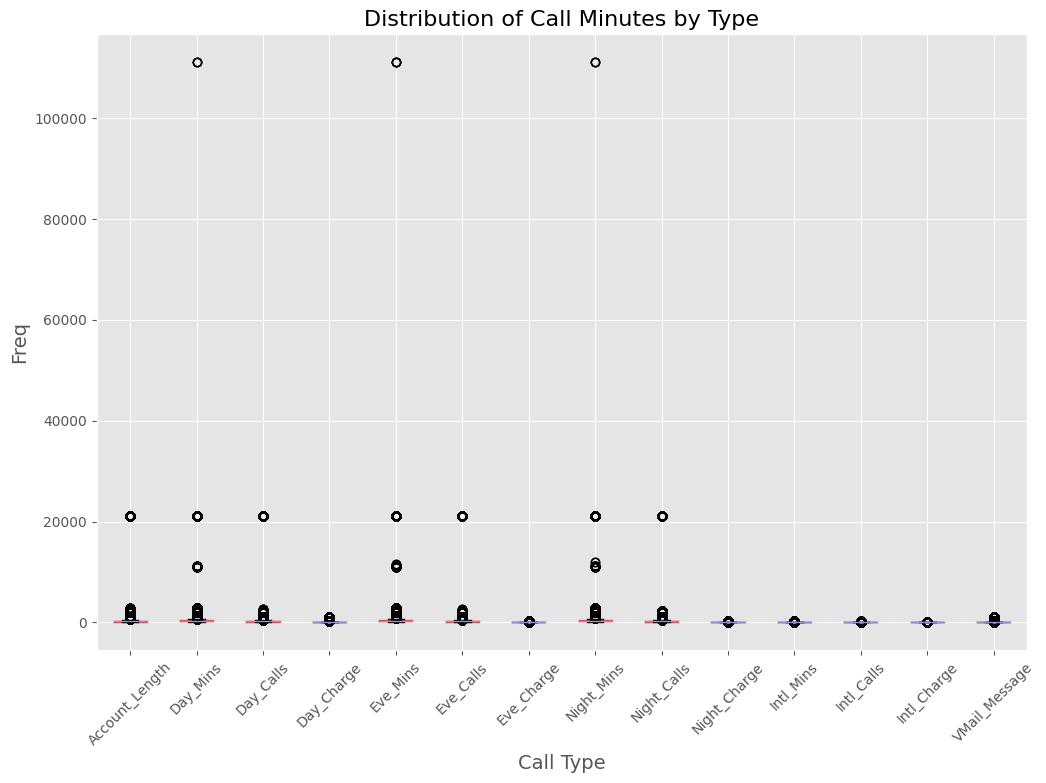

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

# boxplot (all in one)
df.boxplot(column= numeric_cols,
           ax=ax)

# labellingg
ax.set_title('Distribution of Call Minutes by Type', fontsize=16)
ax.set_xlabel('Call Type', fontsize=14)
ax.set_ylabel('Freq', fontsize=14)
ax.set_xticklabels(numeric_cols, rotation=45)

plt.show()

#### By visualizing through box plot we are able to clearly identify outliers

In [25]:
df[df['Account_Length'] > 10000]

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
18153     777-9685           21111             22   2211.20       1111   
18182     987-6577           21111              0    222.11        911   
18203     985-5887           21111              0   2011.20        200   
18214     755-5578           21111              0   2112.20        112   
18278     786-5957           21111            112   2119.11        226   
...            ...             ...            ...       ...        ...   
26096     987-9958           21111              0    222.20       2211   
26157     989-7887           21111              0    290.00        200   
26200     789-7997           21111              0   2116.20         62   
26204     768-9758           21111           1111  21111.20       2119   
26207     785-7595           21111              0   2911.00        222   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
18153     29.2110   2011.90        202     22.1111      222.20          211   
18182     22.2200    220.11       1111     22.2900     2911.11          202   
18203    112.1111    290.90        202     26.2110      296.00          229   
18214    211.2900    229.00       2011     20.2200     2110.00          200   
18278    112.2200   2611.11      21111    211.1111      262.11          226   
...           ...       ...        ...         ...         ...          ...   
26096     22.1100    229.11        611     22.2110      222.20          112   
26157    112.1100    226.60        211     20.9600     1102.20          202   
26200    211.6110   2112.20         60    211.9200      226.20          222   
26204     26.1111   2611.11         29     22.1120     2116.20           22   
26207    110.2110   2211.60        202     29.0200      229.20          209   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
18153       11.1100      22.60         211       11.920               0   True  
18182      211.2900      22.11           2       11.290              11  False  
18203       11.1120      11.90           2        2.200               0   True  
18214       11.2000      20.11           6        2.112               0  False  
18278       22.9200       2.11          11        2.011               2  False  
...             ...        ...         ...          ...             ...    ...  
26096        9.1120     211.60          11       11.620               2  False  
26157      211.6900       9.11           2        2.112               2  False  
26200        6.1111      22.00           2        2.920               2   True  
26204       11.1190       9.20           2        2.620              11  False  
26207       20.1120      22.90           2       11.211               2   True  

[270 rows x 17 columns]

In [26]:
df[df['Account_Length'] > 10000].nunique()

Phone_Number      267
Account_Length      1
VMail_Message      10
Day_Mins           59
Day_Calls          25
Day_Charge         70
Eve_Mins           61
Eve_Calls          28
Eve_Charge         60
Night_Mins         57
Night_Calls        27
Night_Charge       73
Intl_Mins          29
Intl_Calls          8
Intl_Charge        31
CustServ_Calls      3
Churn               2
dtype: int64

- only 200 rows having account length greater then 10k which is all the same value(it has only 1 unique value) from the looks of it [21111]

- could've done a more nuanced outlier detection by doing feature engineering but not sure what features to create so we shall not do that

In [27]:
df[(df['Day_Mins'] > 20000)]

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
18121     978-5875             222            112  21111.60        112   
18132     767-7969             222              0  21111.20        222   
18134     765-7787            2110              0  21111.00        222   
18161     757-7858              92             22  21111.20      21111   
18186     777-7977            1111              0  21111.11        209   
...            ...             ...            ...       ...        ...   
26191     988-5689             222              0  21111.20        911   
26204     768-9758           21111           1111  21111.20       2119   
26211     999-5977             112              0  21111.00         92   
26214     757-8595              99              0  21111.20         96   
26215     799-7995             112              0  21111.20        222   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
18121    211.9600    222.00        222     211.112     1126.20           92   
18132     26.1120   2119.20        911      20.112     2011.11        21111   
18134    112.2200     22.90         99       6.200     2112.11          211   
18161     22.6200    222.20       1111     211.260       20.60           29   
18186     20.0900   2112.20         92     211.116    21111.20           99   
...           ...       ...        ...         ...         ...          ...   
26191    211.1120    266.90         92      22.690      292.20         2211   
26204     26.1111   2611.11         29      22.112     2116.20           22   
26211     20.2600    262.11         92     211.911     2112.11         2112   
26214     20.1111    226.11       2110      20.911     2911.20          222   
26215     26.1111   2211.20        229       9.290     2112.20           92   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
18121        22.690      22.20          11      11.0200               0  False  
18132         9.200      20.60           2       2.1160               0  False  
18134        11.211       9.11          29       2.1120               0  False  
18161        11.211      22.00          11       2.9200               2  False  
18186        11.220      22.00          11      11.2200               0  False  
...             ...        ...         ...          ...             ...    ...  
26191        11.900      11.11          11       2.1111              11   True  
26204        11.119       9.20           2       2.6200              11  False  
26211        22.220      20.60           6       2.1160               2  False  
26214        11.911      22.20           2      11.1111              11  False  
26215        11.220      22.11           2      11.2900               0  False  

[585 rows x 17 columns]

In [28]:
df[(df['Day_Mins'] > 20000)]['Day_Mins'].nunique()

6

In [29]:
df[(df['Eve_Mins'] > 20000)]

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
18139     797-7558             112              0   2112.11        211   
18140     797-6857              20              0    290.00        209   
18183     977-6857             262             26    222.90         92   
18191     778-9769              20              0    220.20        911   
18198     985-7778              92              0   2112.90       2011   
...            ...             ...            ...       ...        ...   
26227     989-6977            1111             22    222.20        222   
26230     799-6777             119              0   2211.20        112   
26231     799-9859            2611              0    292.20         90   
26237     959-9989             611              0   2112.20        112   
26238     999-5667             211              0   2110.11        209   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
18139     22.1111  21111.11        200    211.2200      202.20          611   
18140    112.1100  21111.20        112     22.9110     2112.11          202   
18183   1111.2110  21111.20        112     26.0000     2112.60           62   
18191    211.9110  21111.20        202    211.2900     2211.60           26   
18198     26.1120  21111.00        202    211.2110     2119.60          112   
...           ...       ...        ...         ...         ...          ...   
26227   1111.2000  21111.11       1111     20.1100      222.20          116   
26230    110.1111  21111.20         22     29.1160     2112.90          220   
26231   1111.1120  21111.11       2211     26.0200      222.20           92   
26237    119.2900  21111.20       1111    211.0200      292.11         2211   
26238    110.2200  21111.11       1111     22.1111      292.90           92   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
18139        2.1190      22.20           2       11.920              11  False  
18140       11.2200       6.11           6        2.200               0  False  
18183       22.2600      22.20           2       11.220               0  False  
18191       20.2900     211.00           2        2.011               2  False  
18198       11.1111      11.00          11        2.260               2   True  
...             ...        ...         ...          ...             ...    ...  
26227        2.1120      22.11           2       11.220               2  False  
26230       11.9200       9.20           2        2.260               2  False  
26231        9.1100       2.11          11        2.220               2  False  
26237       11.6200       9.60           2        2.119              11  False  
26238       11.6200      22.20           6       11.112               2  False  

[712 rows x 17 columns]

In [30]:
df[(df['Eve_Mins'] > 20000)]['Eve_Mins'].nunique()

7

In [31]:
df[(df['Night_Mins'] > 20000)]

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
18151     796-5567             229              0    220.20         92   
18174     779-6759              22           1111   2911.20         92   
18180     796-7578             226              0    222.60         20   
18186     777-7977            1111              0  21111.11        209   
18204     795-7785             110              0    222.11        200   
...            ...             ...            ...       ...        ...   
26148     798-9775             220              0    292.60       2211   
26156     755-5889             116              0    222.90        222   
26210     775-7999            2112              0    262.90       2211   
26216     799-9898             206            110    220.20       2011   
26221     798-9969             911              0    260.00      21111   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
18151     211.112    222.11         92     211.200    21111.11         2011   
18174     112.911    226.20         96      20.920    21111.00           92   
18180    1111.920    226.90        110     211.220    21111.11           60   
18186      20.090   2112.20         92     211.116    21111.20           99   
18204      22.211   2211.00        202      22.220    21111.20           62   
...           ...       ...        ...         ...         ...          ...   
26148     112.220    206.20       2011      22.112    21111.20          911   
26156     112.220   2211.20        222     211.611    21111.20         1111   
26210     211.011    226.11         96      20.211    21111.11         2211   
26216     112.220    222.20        209     211.119    21111.20           96   
26221      22.200   2211.11        911     211.110    21111.90          112   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
18151        11.220      22.20           9       11.000               2  False  
18174         6.220      22.60          11       11.920               2  False  
18180         6.920       2.11           2        2.220               2  False  
18186        11.220      22.00          11       11.220               0  False  
18204        22.119       2.90           9        2.211               2  False  
...             ...        ...         ...          ...             ...    ...  
26148        22.220      20.11          11        2.920               2  False  
26156        22.960       2.20          11        2.920               0   True  
26210        20.211      20.00           9        2.200               2  False  
26216         2.211     211.20          11       11.112               0  False  
26221        11.110       9.20           2        2.260               0  False  

[709 rows x 17 columns]

In [32]:
df[(df['Night_Mins'] > 20000)]['Night_Mins'].nunique()

6

In [33]:
df[df['Day_Charge'] > 1000]

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
18128     976-7576            1111             22    296.20       2119   
18131     798-6557             211              0    222.20         90   
18143     799-7889             211              0    226.20       2011   
18158     777-5986             611              0    222.11        220   
18169     789-6775             222            110   2911.20        229   
...            ...             ...            ...       ...        ...   
26167     755-9985              22              0   2211.11         62   
26198     787-9996             260              0    206.11         66   
26209     997-9758             222             22    222.20        222   
26227     989-6977            1111             22    222.20        222   
26231     799-9859            2611              0    292.20         90   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
18128    1111.119   2110.90         90    211.1111      119.11          211   
18131    1111.211   2119.11       1111    211.1160      292.11           22   
18143    1111.220    202.11        202     22.2110      226.20          911   
18158    1111.920    262.60        222    211.1120     2112.20         2211   
18169    1111.211    211.11         22      6.2000     2112.20           22   
...           ...       ...        ...         ...         ...          ...   
26167    1111.011    222.11         22     20.1120     2211.11         2116   
26198    1111.020    222.20        209     20.2900      222.11          202   
26209    1111.211    226.00        206     22.2200      222.20          911   
26227    1111.200  21111.11       1111     20.1100      222.20          116   
26231    1111.112  21111.11       2211     26.0200      222.20           92   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
18128         2.020     211.11           2      11.2110               2  False  
18131        11.611     211.00           2      11.1120               2  False  
18143        22.011      20.11          11       2.2110               2  False  
18158         6.060     211.20          11      11.1160              11  False  
18169        11.211      11.11          11       2.1120              11   True  
...             ...        ...         ...          ...             ...    ...  
26167        20.020      22.11          11      11.1120              11  False  
26198        20.211      22.20           6      11.2600               0  False  
26209        20.116      11.11           2       2.1111               2  False  
26227         2.112      22.11           2      11.2200               2  False  
26231         9.110       2.11          11       2.2200               2  False  

[914 rows x 17 columns]

In [34]:
df[df['Day_Charge'] > 1000]['Day_Charge'].nunique()

25

In [35]:
df[df['VMail_Message'] > 1000]['VMail_Message'].nunique()

1

- even though the mins features might have extreme values those have single digit unique values indicating outliers (all those customers only seem to have the same 6 values repeating over so yeah it's best to include them for outlier removal)

- from seeing the above it is best to include day, eve & night mins features for outlier detection because it quite varies unless there's a way to pinpoint them out by means of a intuitive feature engineering?

In [36]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
#     return df[(df[column_name] <= upper_bound)]


In [37]:
outlier_cols = ['Account_Length','Day_Mins','Day_Calls', 'Eve_Mins', 'Eve_Calls', 'Night_Mins','Night_Calls']
# Loop through each selected col/feature
for col in outlier_cols:
    df = remove_outliers_iqr(df, col)

# Resetting index after filtering else it'll be inconsistent!
df.reset_index(drop=True, inplace=True)


In [38]:
df.shape

(36077, 17)

- dropped 24k ish rows there

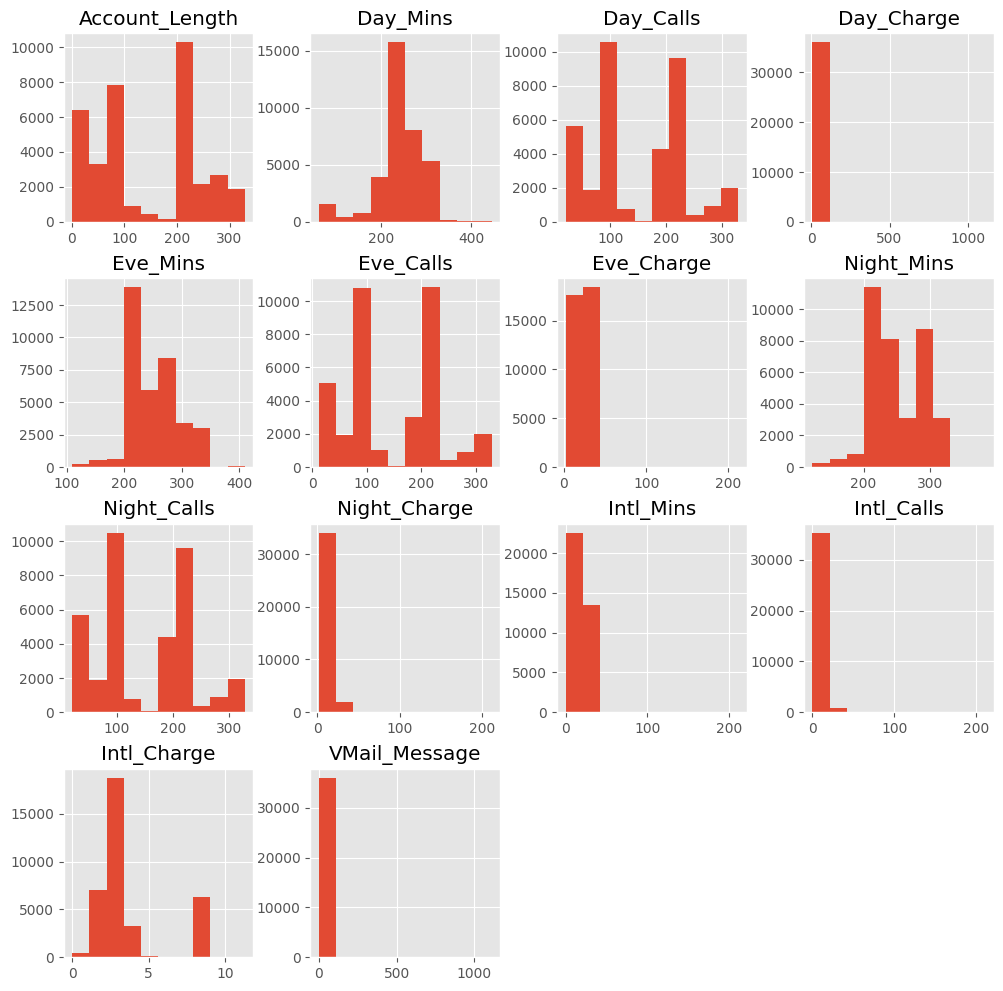

In [39]:
# histograms
df[numeric_cols].hist(figsize=(12, 12))
plt.show()

- After addressing some outliers the histogram looks not so skewed now

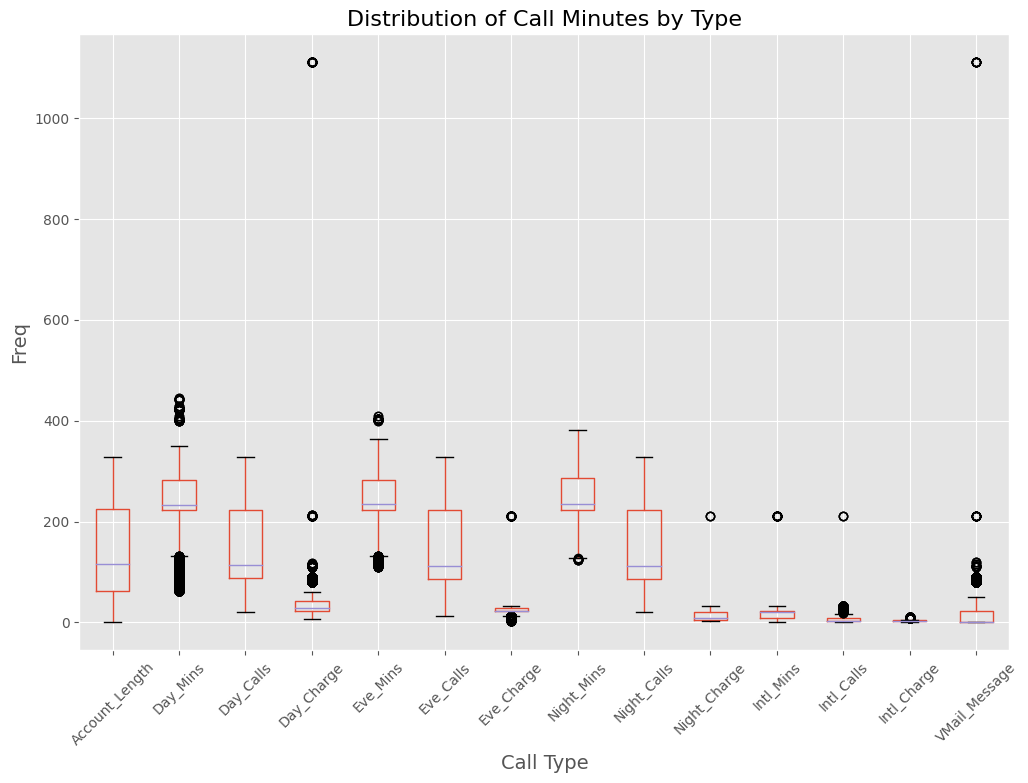

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

# box plot
df.boxplot(column=numeric_cols,
           ax=ax)

# titles and labels
ax.set_title('Distribution of Call Minutes by Type', fontsize=16)
ax.set_xlabel('Call Type', fontsize=14)
ax.set_ylabel('Freq', fontsize=14)
ax.set_xticklabels(numeric_cols, rotation=45)

plt.show()

- By means of another boxplot after removing extreme/impossible values we can get a more better viz

In [41]:
df = df[(df['Day_Charge'] < 1000) & (df['VMail_Message'] < 1000)]

In [42]:
df.shape

(36033, 17)

- from 60k rows to 36k rows after removing outliers, that's around 24k rows lost in outliers
- removed another 50ish rows by addressing the outliers in day_charege and vmail_message from previous box plot 

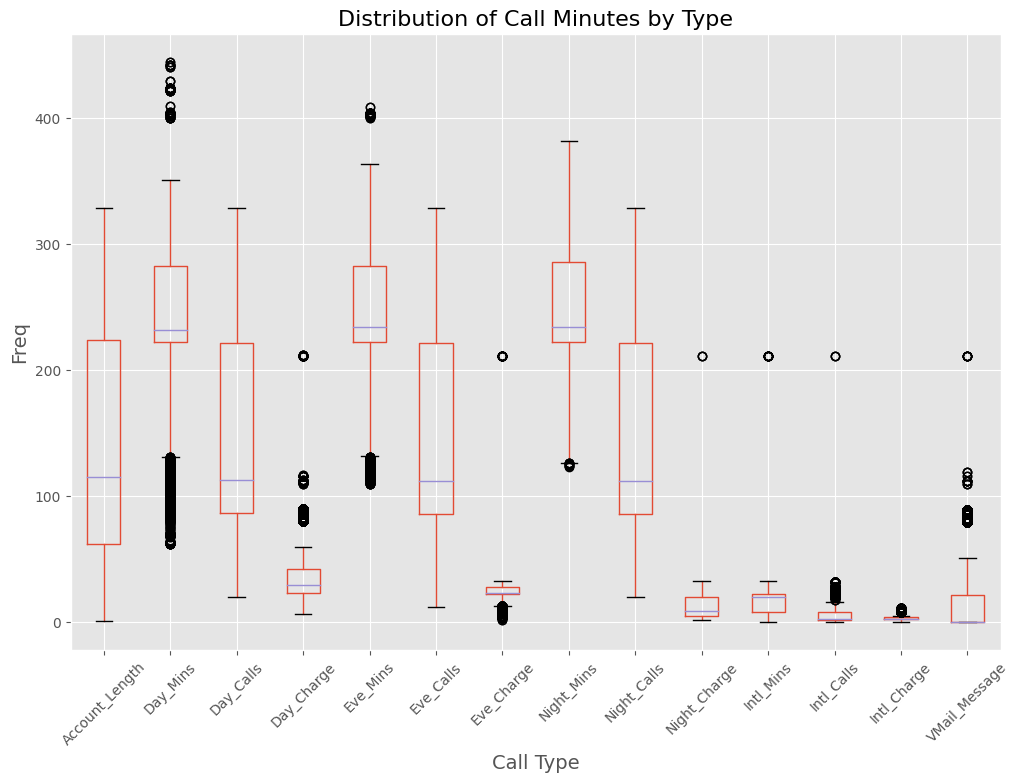

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

# box plot
df.boxplot(column=numeric_cols,
           ax=ax)

# titles and labels
ax.set_title('Distribution of Call Minutes by Type', fontsize=16)
ax.set_xlabel('Call Type', fontsize=14)
ax.set_ylabel('Freq', fontsize=14)
ax.set_xticklabels(numeric_cols, rotation=45)

plt.show()

- looks cleaned up now :)

#### Checking summary stats after removing outliers
-

In [44]:
df.describe()

Account_Length  VMail_Message      Day_Mins     Day_Calls  \
count    36033.000000   36033.000000  36033.000000  36033.000000   
mean       147.928205      11.216607    241.267724    149.078456   
std         96.566663      22.171680     53.103504     86.367865   
min          1.000000       0.000000     62.300000     20.000000   
25%         62.000000       0.000000    222.200000     87.000000   
50%        115.000000       0.000000    232.200000    113.000000   
75%        224.000000      22.000000    282.800000    222.000000   
max        329.000000     211.000000    444.400000    329.000000   

         Day_Charge      Eve_Mins     Eve_Calls    Eve_Charge    Night_Mins  \
count  36033.000000  36033.000000  36033.000000  36033.000000  36033.000000   
mean      39.768770    249.978860    148.892904     24.370483    250.316727   
std       24.035258     40.496675     86.248911      6.932231     39.543004   
min        6.220000    109.600000     12.000000      2.110000    123.500000   
25%       23.230000    222.400000     86.000000     22.220000    222.400000   
50%       29.240000    234.400000    112.000000     23.220000    234.400000   
75%       42.420000    282.900000    222.000000     28.280000    286.200000   
max      211.990000    409.200000    329.000000    211.260000    381.900000   

        Night_Calls  Night_Charge     Intl_Mins    Intl_Calls   Intl_Charge  \
count  36033.000000  36033.000000  36033.000000  36033.000000  36033.000000   
mean     148.205673     11.650730     15.632100      4.838315      3.703050   
std       86.024933      8.339419      9.964079      4.686556      2.290302   
min       20.000000      2.000000      0.000000      0.000000      0.000000   
25%       86.000000      4.920000      8.200000      2.000000      2.280000   
50%      112.000000      9.200000     20.000000      3.000000      2.820000   
75%      222.000000     20.290000     22.300000      8.000000      4.000000   
max      329.000000    211.220000    211.200000    211.000000     11.290000   

       CustServ_Calls  
count    36033.000000  
mean         2.181084  
std          2.014803  
min          0.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max         11.000000

In [45]:
df

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
0         382-4657             128             25     265.1        110   
1         371-7191             107             26     161.6        123   
2         358-1921             137              0     243.4        114   
3         330-6626              75              0     166.7        113   
4         391-8027             118              0     223.4         98   
...            ...             ...            ...       ...        ...   
36072     796-5759             228              0     222.8         92   
36073     779-7579              62              0     228.8         92   
36074     789-9756             222              0     228.2         60   
36075     798-5885              88              0     282.2        222   
36076     999-9897             228              0     222.0         99   

       Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0           45.07     197.4         99       16.78       244.7           91   
1           27.47     195.5        103       16.62       254.4          103   
2           41.38     121.2        110       10.30       162.6          104   
3           28.34     148.3        122       12.61       186.9          121   
4           37.98     220.6        101       18.75       203.9          118   
...           ...       ...        ...         ...         ...          ...   
36072       29.82     280.0        202       22.28       268.6          229   
36073       29.88     292.8         92       26.88       222.9           89   
36074       22.82     229.8        289       28.26       222.8          222   
36075       82.88     208.8        220       22.82       282.2          200   
36076       88.08     220.2         80       22.92       282.9           28   

       Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
0             11.01       10.0           3         2.70               1  False  
1             11.45       13.7           3         3.70               1  False  
2              7.32       12.2           5         3.29               0  False  
3              8.41       10.1           3         2.73               3  False  
4              9.18        6.3           6         1.70               0  False  
...             ...        ...         ...          ...             ...    ...  
36072         22.09        9.6           2         2.89               2  False  
36073          9.62       20.2           2         2.82               8  False  
36074          2.28        6.2           2         2.62               2  False  
36075         20.68        9.8           8         2.82               8  False  
36076         20.22        2.2           8         0.82               0  False  

[36033 rows x 17 columns]

## Other visualizations

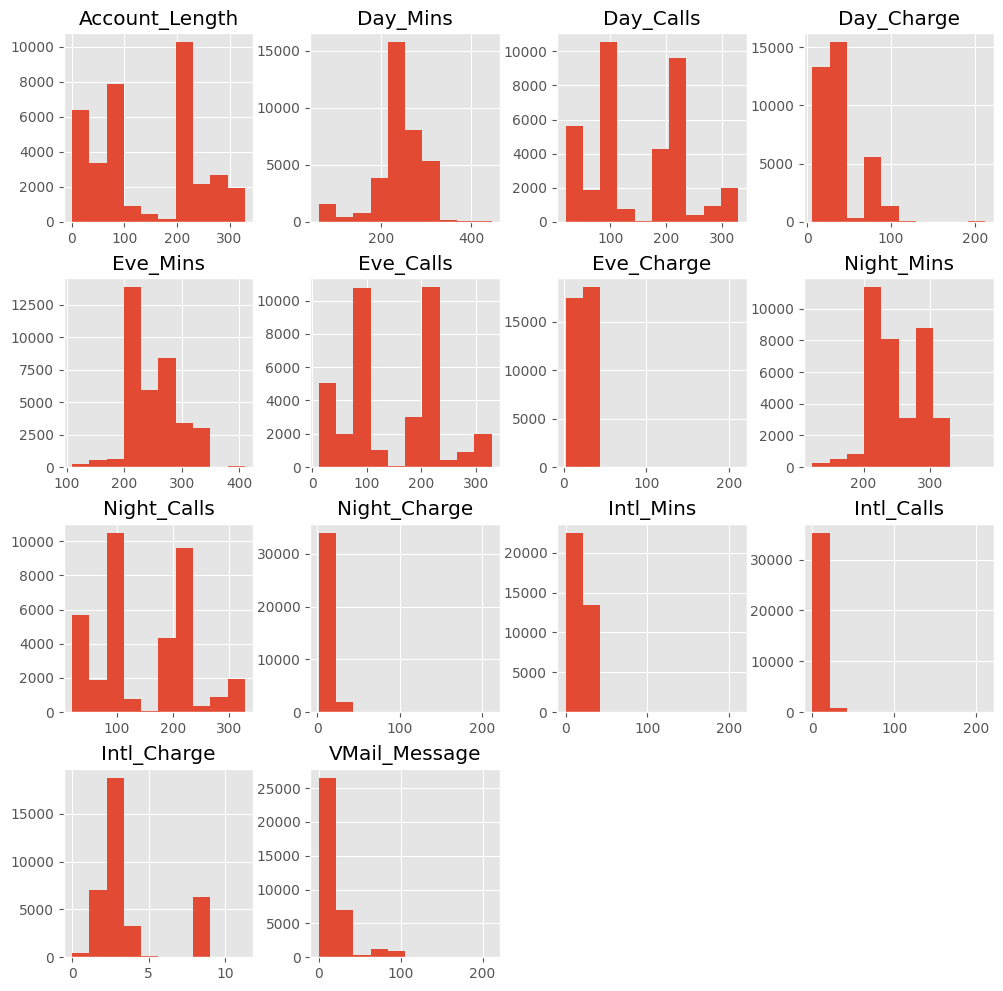

In [46]:
# histograms
df[numeric_cols].hist(figsize=(12, 12))
plt.show()

- those columns which have been included for outlier removal has less skewed distribution now

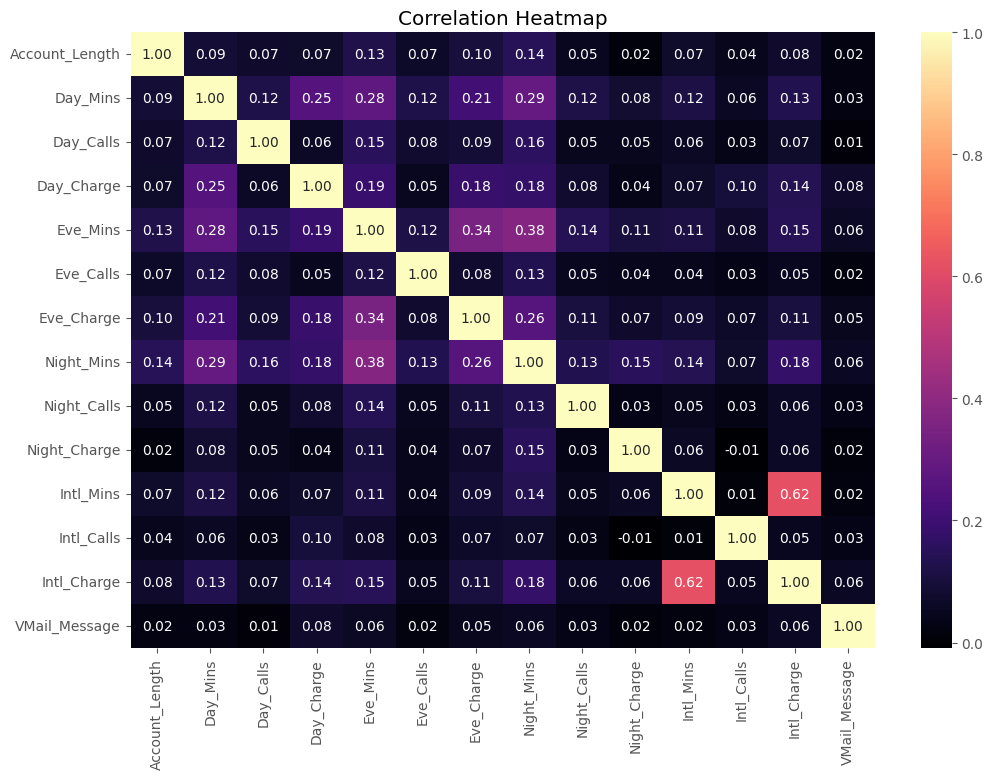

In [47]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

- High correlation between intl_mins and intl_charge which is apparent and expected
- day_mins have 0.25 corr with day_charge
- eve_mins have 0.34 corr with eve_charge
- night_mins have 0.15 corr with night_charge (which is relatively low)
- corr of intl_charge with day_mins, eve_mins & night_mins 0.15 <= corr < 0.20 indicates that these calls are talked around those timeframe?

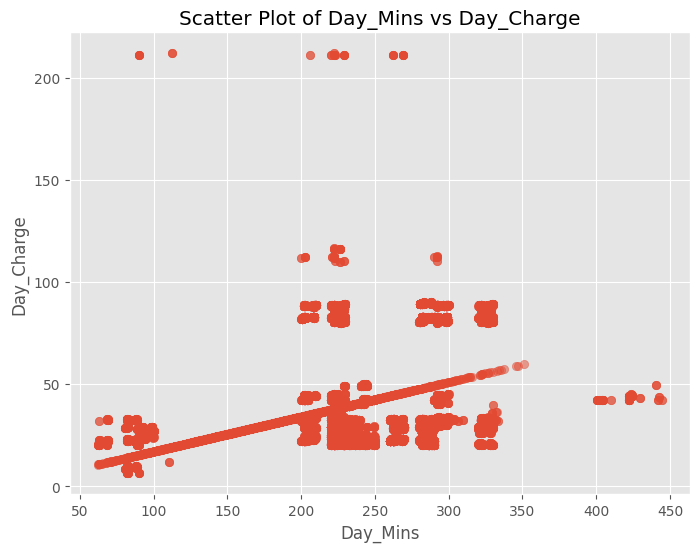

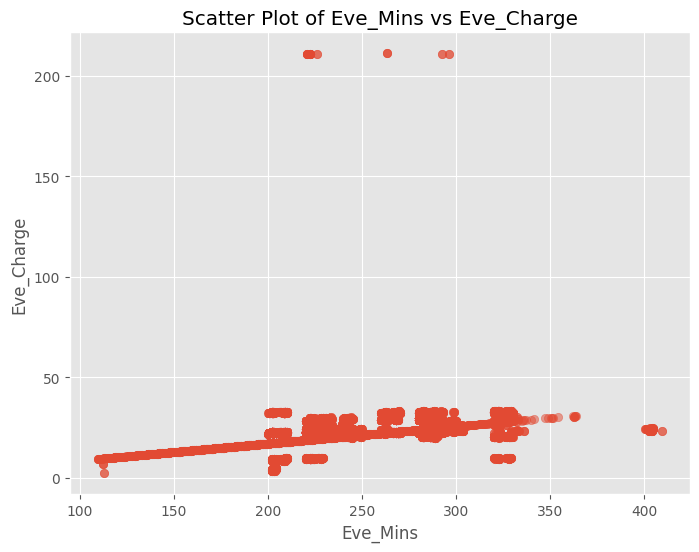

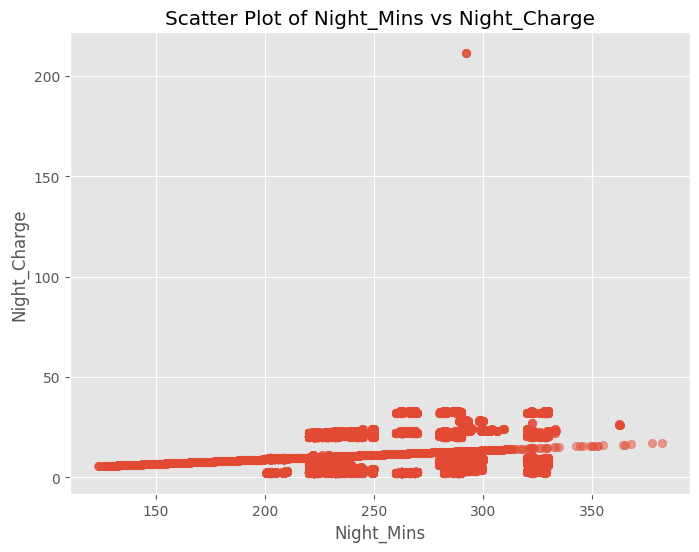

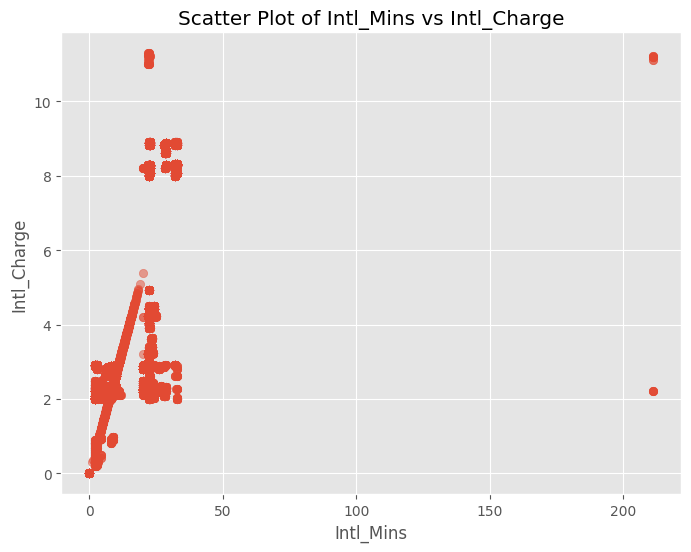

In [48]:
# List of feature pairs 
feature_pairs = [
    ('Day_Mins', 'Day_Charge'),
    ('Eve_Mins', 'Eve_Charge'),
    ('Night_Mins', 'Night_Charge'),
    ('Intl_Mins', 'Intl_Charge'),
    # ...
]

# scatter plots for each pair
for x, y in feature_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.show()


- Shows somewhat linear relationship indicating as mins increases so does price (charge) across day, eve, night & intl

(array([2.6028e+04, 5.0000e+02, 5.0710e+03, 1.9090e+03, 3.9100e+02,
        0.0000e+00, 0.0000e+00, 1.1630e+03, 9.4700e+02, 0.0000e+00,
        1.3000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([  0.  ,  10.55,  21.1 ,  31.65,  42.2 ,  52.75,  63.3 ,  73.85,
         84.4 ,  94.95, 105.5 , 116.05, 126.6 , 137.15, 147.7 , 158.25,
        168.8 , 179.35, 189.9 , 200.45, 211.  ]),
 <BarContainer object of 20 artists>)

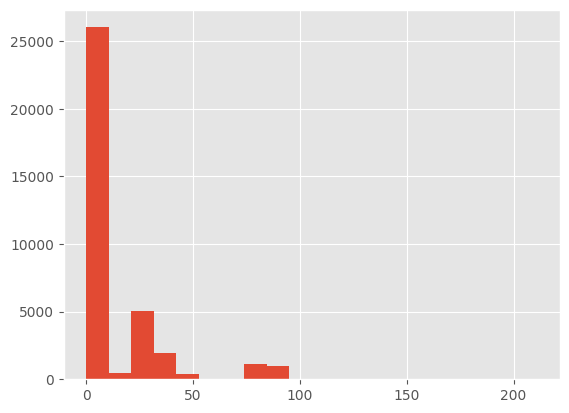

In [49]:
plt.hist(df['VMail_Message'], bins=20)

- just checking the vmailmessage feature for anything unusual

In [50]:
# # pairplot
# sns.set()
# sns.pairplot(df[numeric_cols],size = 2 ,kind ='scatter',diag_kind='kde')
# plt.show()

- bunch of pair plots for all numeric features
- some sort of groups are observed in the above viz indicating potential for clustering

In [51]:
# # violin plot
# for num_col in numeric_cols:
#     sns.catplot(x='Churn', y=num_col, kind='violin', data=df, palette='Set2')
#     plt.title(f'Violin Plot of {num_col} by Churn')
#     plt.xticks(rotation=45)  # Rotate x labels if they overlap
#     plt.show()

In [52]:
# df.to_csv("cleaned_churn.csv")

In [53]:
df.describe()

Account_Length  VMail_Message      Day_Mins     Day_Calls  \
count    36033.000000   36033.000000  36033.000000  36033.000000   
mean       147.928205      11.216607    241.267724    149.078456   
std         96.566663      22.171680     53.103504     86.367865   
min          1.000000       0.000000     62.300000     20.000000   
25%         62.000000       0.000000    222.200000     87.000000   
50%        115.000000       0.000000    232.200000    113.000000   
75%        224.000000      22.000000    282.800000    222.000000   
max        329.000000     211.000000    444.400000    329.000000   

         Day_Charge      Eve_Mins     Eve_Calls    Eve_Charge    Night_Mins  \
count  36033.000000  36033.000000  36033.000000  36033.000000  36033.000000   
mean      39.768770    249.978860    148.892904     24.370483    250.316727   
std       24.035258     40.496675     86.248911      6.932231     39.543004   
min        6.220000    109.600000     12.000000      2.110000    123.500000   
25%       23.230000    222.400000     86.000000     22.220000    222.400000   
50%       29.240000    234.400000    112.000000     23.220000    234.400000   
75%       42.420000    282.900000    222.000000     28.280000    286.200000   
max      211.990000    409.200000    329.000000    211.260000    381.900000   

        Night_Calls  Night_Charge     Intl_Mins    Intl_Calls   Intl_Charge  \
count  36033.000000  36033.000000  36033.000000  36033.000000  36033.000000   
mean     148.205673     11.650730     15.632100      4.838315      3.703050   
std       86.024933      8.339419      9.964079      4.686556      2.290302   
min       20.000000      2.000000      0.000000      0.000000      0.000000   
25%       86.000000      4.920000      8.200000      2.000000      2.280000   
50%      112.000000      9.200000     20.000000      3.000000      2.820000   
75%      222.000000     20.290000     22.300000      8.000000      4.000000   
max      329.000000    211.220000    211.200000    211.000000     11.290000   

       CustServ_Calls  
count    36033.000000  
mean         2.181084  
std          2.014803  
min          0.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max         11.000000

# Clustering for whole dataset

- clustering be performed on only the numerical features so specifying the numeric_cols below to work with instead of dropping the phone_number and churn feature

## Standardizing data

- for performing clustering features need to be standardized so they have the same scale

In [54]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

#creating a copy of the df and using that for normalizing
df_standardized = df.copy()

scaler = StandardScaler()

#redifining numeric cols cuz added 2 new aggregate features
numeric_cols = ['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 
                    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 
                    'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls'
               ]

df_standardized[numeric_cols] = scaler.fit_transform(df_standardized[numeric_cols])


print(df_standardized.describe())

       Account_Length  VMail_Message      Day_Mins     Day_Calls  \
count    3.603300e+04   3.603300e+04  3.603300e+04  3.603300e+04   
mean     7.020043e-17  -5.205875e-17 -2.520117e-16 -3.470583e-17   
std      1.000014e+00   1.000014e+00  1.000014e+00  1.000014e+00   
min     -1.521542e+00  -5.059050e-01 -3.370215e+00 -1.494540e+00   
25%     -8.898454e-01  -5.059050e-01 -3.590721e-01 -7.187780e-01   
50%     -3.409941e-01  -5.059050e-01 -1.707580e-01 -4.177359e-01   
75%      7.877755e-01   4.863656e-01  7.821113e-01  8.443251e-01   
max      1.875122e+00   9.010872e+00  3.825267e+00  2.083229e+00   

         Day_Charge      Eve_Mins     Eve_Calls    Eve_Charge    Night_Mins  \
count  3.603300e+04  3.603300e+04  3.603300e+04  3.603300e+04  3.603300e+04   
mean  -1.135827e-16  2.464903e-16 -5.048121e-17  3.013097e-16 -7.465698e-16   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min   -1.395834e+00 -3.466477e+00 -1.587206e+00 -3.211202e+00 -3.207103

In [55]:
df_standardized.head()

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
0     382-4657       -0.206370       0.621675  0.448795  -0.452472   
1     371-7191       -0.423840       0.666778 -1.500256  -0.301950   
2     358-1921       -0.113169      -0.505905  0.040154  -0.406157   
3     330-6626       -0.755221      -0.505905 -1.404215  -0.417736   
4     391-8027       -0.309927      -0.505905 -0.336474  -0.591414   

   Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0    0.220564 -1.298368  -0.578484   -1.094970   -0.142043    -0.664999   
1   -0.511704 -1.345286  -0.532106   -1.118051    0.103263    -0.525502   
2    0.067037 -3.180030  -0.450944   -2.029747   -2.218292    -0.513878   
3   -0.475507 -2.510830  -0.311810   -1.696517   -1.603763    -0.316258   
4   -0.074424 -0.725474  -0.555295   -0.810787   -1.173845    -0.351132   

   Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  
0     -0.076833  -0.565248   -0.392258    -0.437961       -0.586211  False  
1     -0.024070  -0.193909   -0.392258    -0.001332       -0.586211  False  
2     -0.519316  -0.344452    0.034500    -0.180350       -1.082545  False  
3     -0.388609  -0.555212   -0.392258    -0.424862        0.406455  False  
4     -0.296275  -0.936587    0.247879    -0.874591       -1.082545  False

- in case there's need for standardized features 

# Inference

### DR first then clustering gave better cluster results and also was computationally less expensive (time taken to run)

# Splitting data on churn

In [56]:
# Split the dataset
churn_true = df[df['Churn'] == True]
churn_false = df[df['Churn'] == False]

churn_true_std = churn_true.copy()
churn_false_std = churn_false.copy()

# Standardize the split datasets
scaler = StandardScaler()
churn_true_std[numeric_cols] =scaler.fit_transform(churn_true[numeric_cols])
churn_false_std[numeric_cols] =scaler.fit_transform(churn_false[numeric_cols])

In [58]:
churn_true.shape

(4153, 17)

In [59]:
churn_true.describe()

Account_Length  VMail_Message     Day_Mins    Day_Calls   Day_Charge  \
count     4153.000000    4153.000000  4153.000000  4153.000000  4153.000000   
mean       151.982422       6.745967   251.937334   155.497231    35.101958   
std         97.249881      17.699462    52.198994    88.118811    19.722774   
min          1.000000       0.000000    62.400000    22.000000     9.890000   
25%         66.000000       0.000000   223.300000    88.000000    22.960000   
50%        130.000000       0.000000   243.200000   151.000000    28.620000   
75%        226.000000       0.000000   288.200000   222.000000    33.220000   
max        329.000000      88.000000   444.400000   329.000000   112.011000   

          Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  Night_Calls  \
count  4153.000000  4153.000000  4153.000000  4153.000000  4153.000000   
mean    251.668505   149.374187    24.665134   251.186162   148.935228   
std      41.799930    87.896389     8.168051    40.990749    88.108880   
min     109.600000    20.000000     3.220000   123.500000    20.000000   
25%     222.800000    86.000000    22.220000   222.300000    82.000000   
50%     236.300000   111.000000    23.230000   236.200000   116.000000   
75%     286.000000   222.000000    28.620000   286.600000   222.000000   
max     404.200000   329.000000   211.211000   354.900000   329.000000   

       Night_Charge    Intl_Mins   Intl_Calls  Intl_Charge  CustServ_Calls  
count   4153.000000  4153.000000  4153.000000  4153.000000     4153.000000  
mean      12.134317    16.643142     4.644835     3.853919        2.460149  
std        8.327518     9.133902     4.392286     2.354785        2.222761  
min        2.020000     2.000000     1.000000     0.320000        0.000000  
25%        6.320000     8.900000     2.000000     2.280000        2.000000  
50%        9.240000    20.200000     3.000000     2.860000        2.000000  
75%       20.360000    22.600000     6.000000     3.920000        2.000000  
max       32.980000    32.900000    32.000000     8.920000        9.000000

In [60]:
churn_false.shape

(31880, 17)

In [61]:
churn_false.describe()

Account_Length  VMail_Message      Day_Mins     Day_Calls  \
count    31880.000000   31880.000000  31880.000000  31880.000000   
mean       147.400063      11.798996    239.877796    148.242284   
std         96.466295      22.624759     53.063296     86.103335   
min          1.000000       0.000000     62.300000     20.000000   
25%         62.000000       0.000000    222.200000     86.000000   
50%        112.000000       0.000000    230.400000    110.000000   
75%        224.000000      22.000000    282.800000    222.000000   
max        329.000000     211.000000    444.400000    329.000000   

         Day_Charge      Eve_Mins     Eve_Calls    Eve_Charge    Night_Mins  \
count  31880.000000  31880.000000  31880.000000  31880.000000  31880.000000   
mean      40.376714    249.758751    148.830207     24.332099    250.203466   
std       24.476160     40.319261     86.033175      6.753818     39.349735   
min        6.220000    109.600000     12.000000      2.110000    123.800000   
25%       23.240000    222.400000     87.000000     22.220000    222.400000   
50%       29.320000    234.400000    112.000000     23.220000    234.400000   
75%       42.940000    282.900000    222.000000     28.280000    286.200000   
max      211.990000    409.200000    329.000000    211.260000    381.900000   

        Night_Calls  Night_Charge     Intl_Mins    Intl_Calls   Intl_Charge  \
count  31880.000000  31880.000000  31880.000000  31880.000000  31880.000000   
mean     148.110634     11.587733     15.500392      4.863519      3.683396   
std       85.750684      8.339034     10.059843      4.723023      2.281071   
min       20.000000      2.000000      0.000000      0.000000      0.000000   
25%       86.000000      4.440000      8.200000      2.000000      2.280000   
50%      111.000000      9.090000     20.000000      3.000000      2.820000   
75%      222.000000     20.280000     22.300000      8.000000      4.000000   
max      329.000000    211.220000    211.200000    211.000000     11.290000   

       CustServ_Calls  
count    31880.000000  
mean         2.144730  
std          1.983259  
min          0.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max         11.000000

# Comparing them together (side by side viz of clustering from earlier)

### don't run the below cell / clear the output cuz takes a lot of time to run

In [97]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

def perform_clustering(data, title):
    # Dimensionality Reduction
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(data)
    
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data)
    
    umap_reducer = umap.UMAP(n_components=2, random_state=42)
    umap_results = umap_reducer.fit_transform(data)
    
    # List of reduced datasets
    reduced_datasets = [pca_results, tsne_results, umap_results]
    reduction_names = ['PCA', 't-SNE', 'UMAP']
    
    # Visualization setup
    fig, axes = plt.subplots(2, 3, figsize=(20, 20))
    fig.suptitle(title, fontsize=16)
    
    for i, (reduced_data, reduction_name) in enumerate(zip(reduced_datasets, reduction_names)):
        # K-Means
        kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
        kmeans_labels = kmeans.fit_predict(reduced_data)
        
        # Hierarchical Clustering
        hierarchical = AgglomerativeClustering(n_clusters=7)
        hierarchical_labels = hierarchical.fit_predict(reduced_data)
        
        # Visualizations
        axes[0, i].scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis')
        axes[0, i].set_title(f'K-Means with {reduction_name}')
        
        axes[1, i].scatter(reduced_data[:, 0], reduced_data[:, 1], c=hierarchical_labels, cmap='viridis')
        axes[1, i].set_title(f'Hierarchical with {reduction_name}')
        
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/conda/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/conda/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/conda/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small 

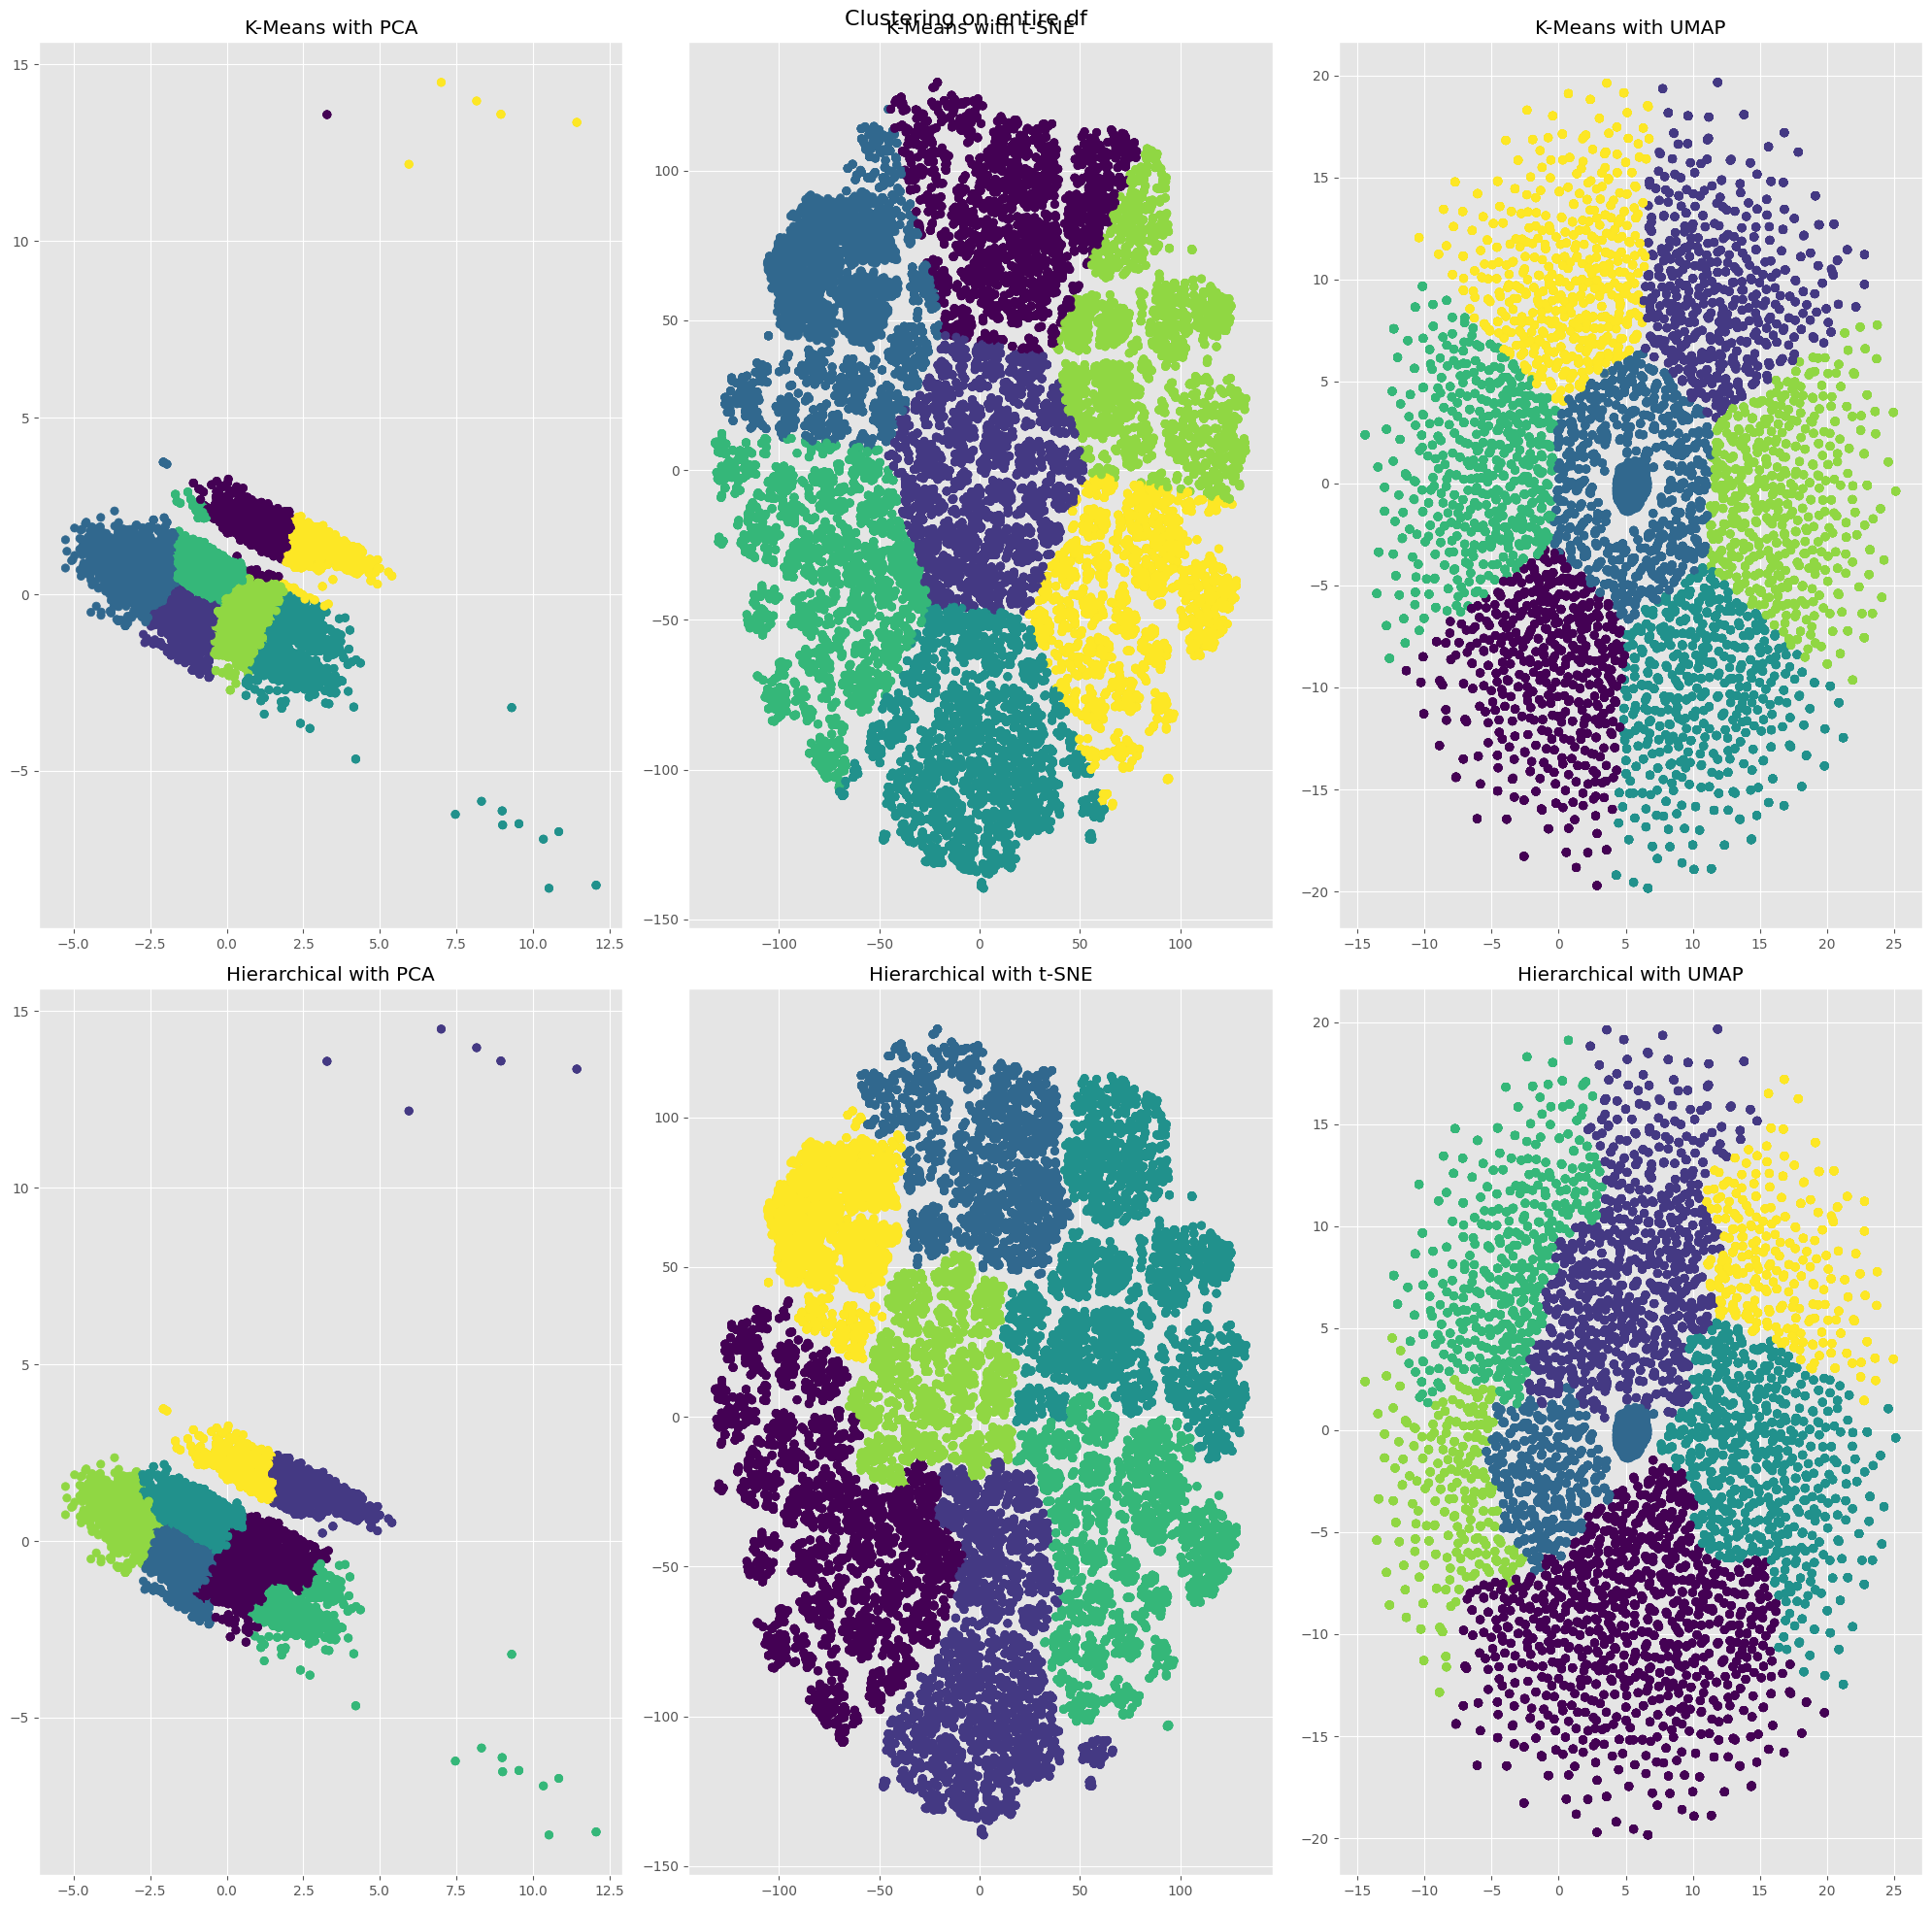

In [98]:
perform_clustering(df_standardized[numeric_cols], 'Clustering on entire df')

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/conda/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/conda/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/conda/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small 

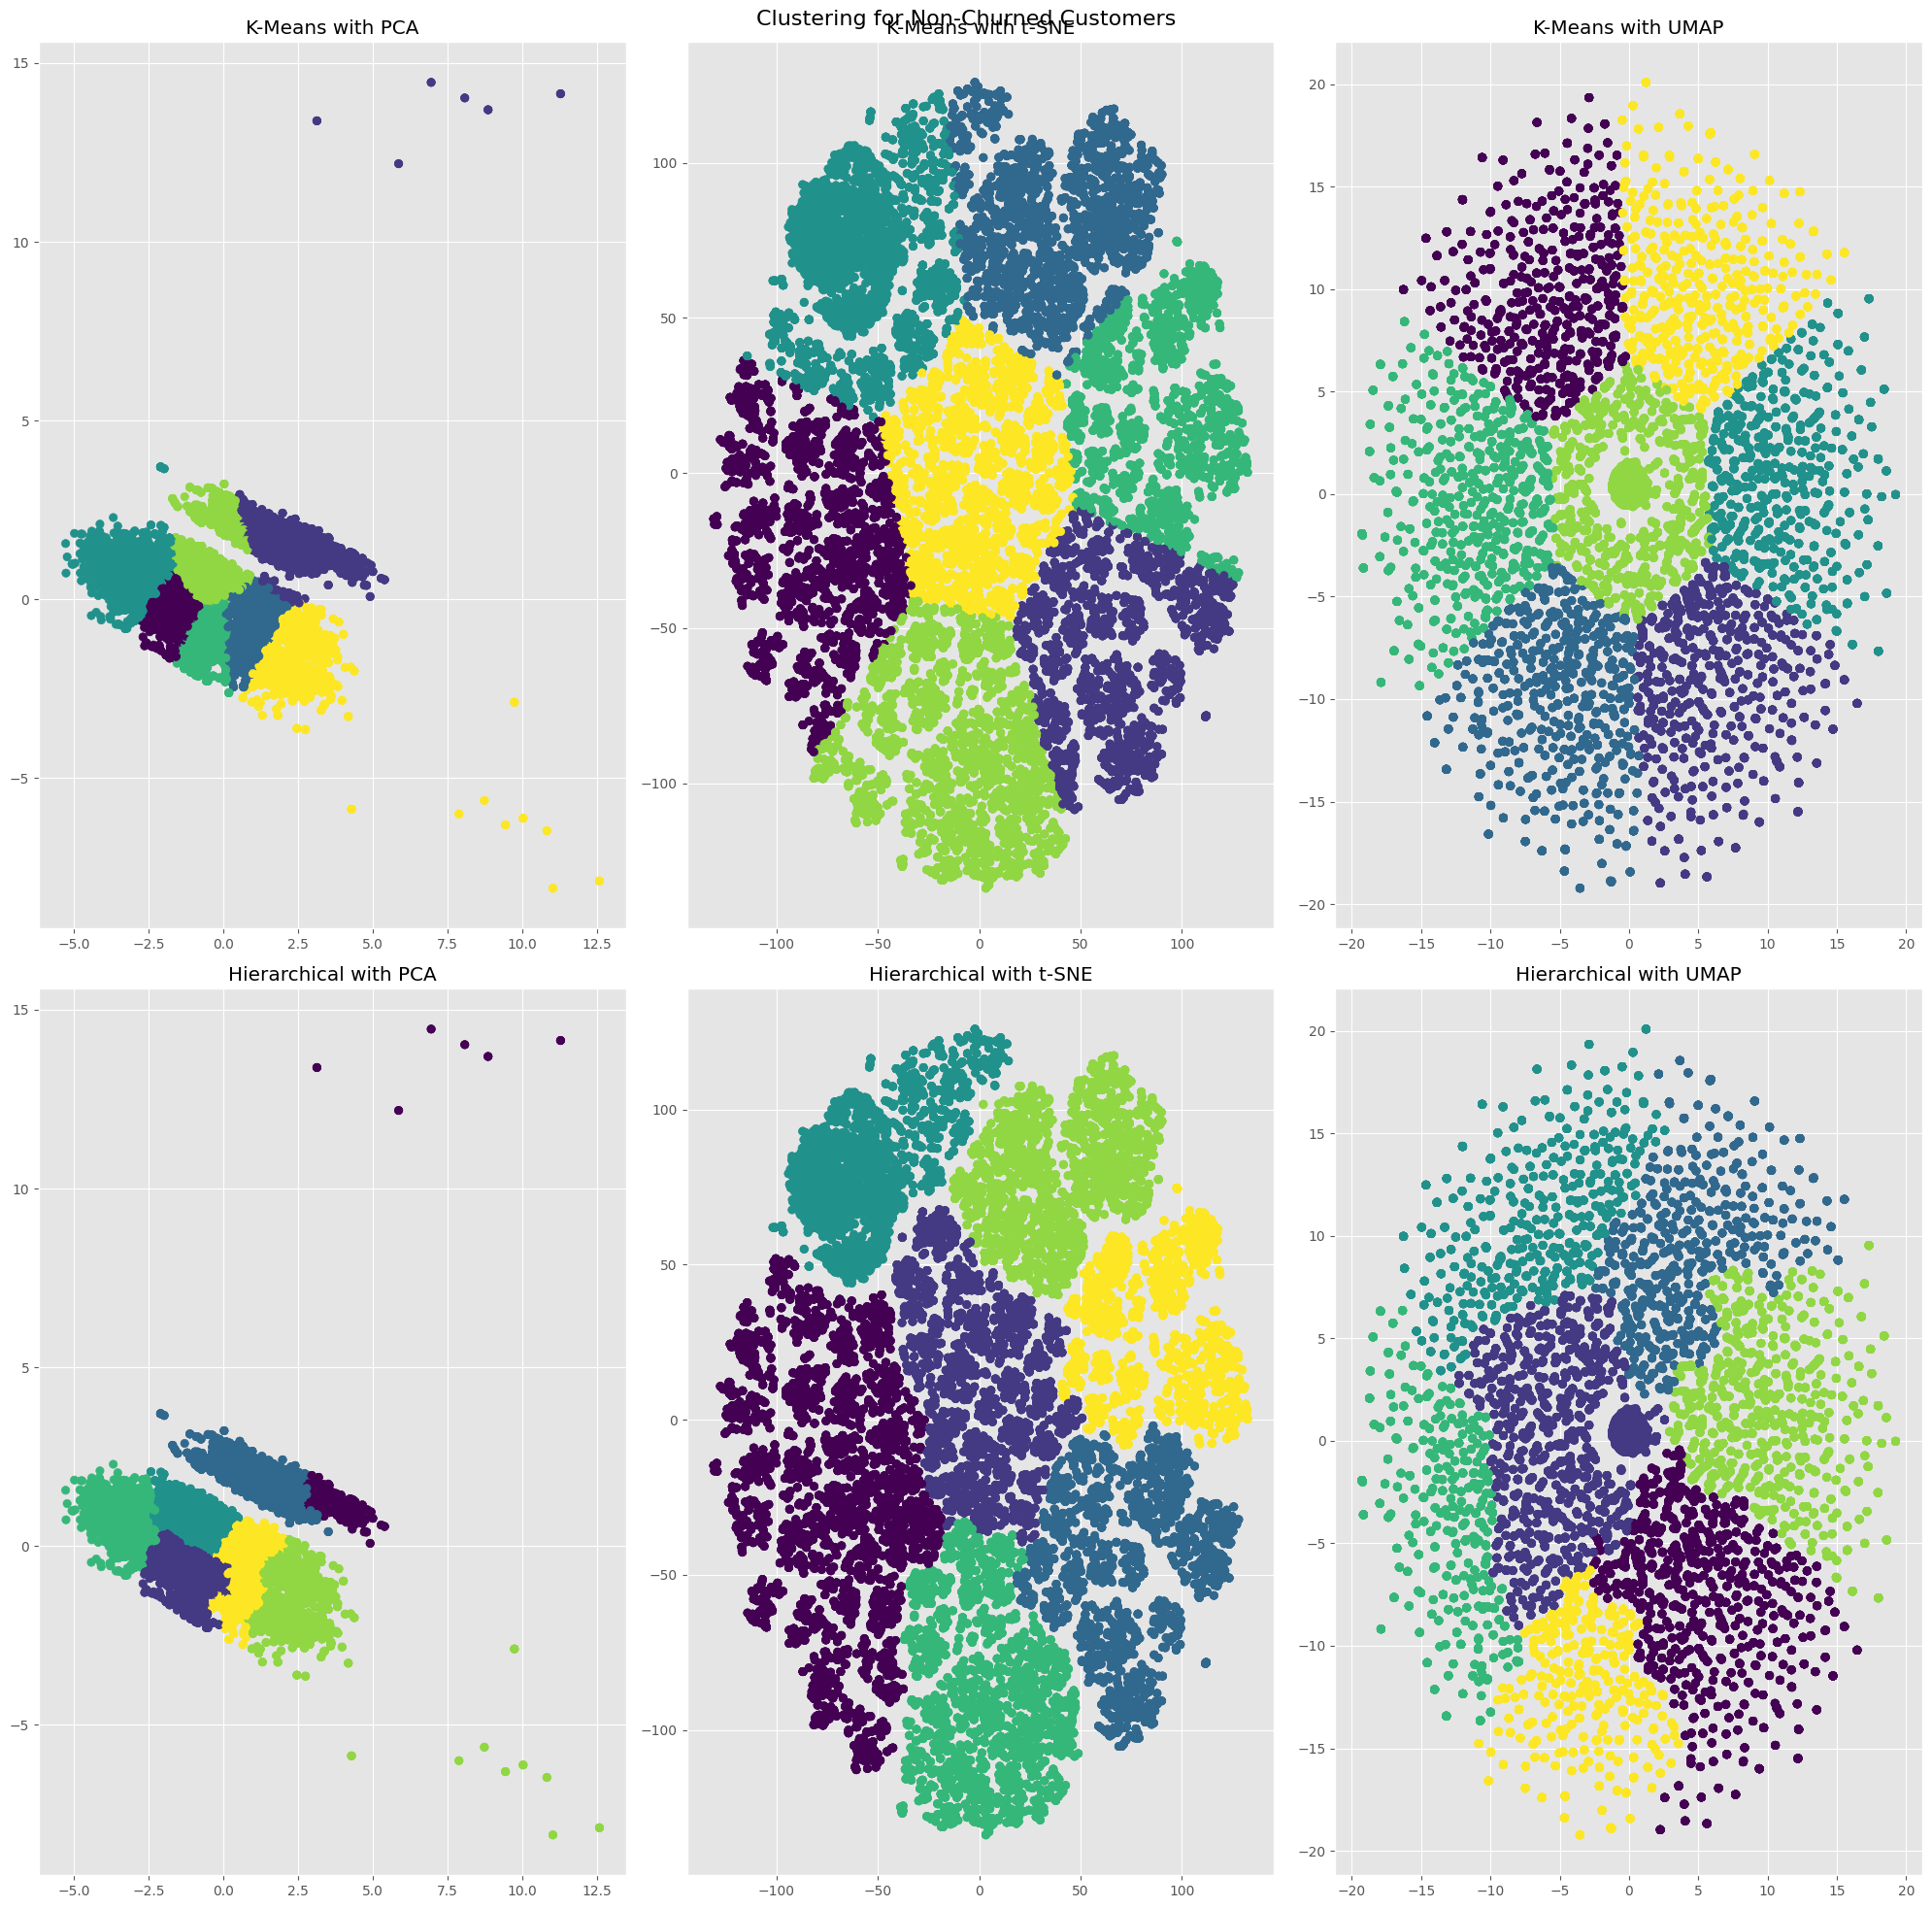

In [102]:
perform_clustering(churn_false_std[numeric_cols], 'Clustering for Non-Churned Customers')

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


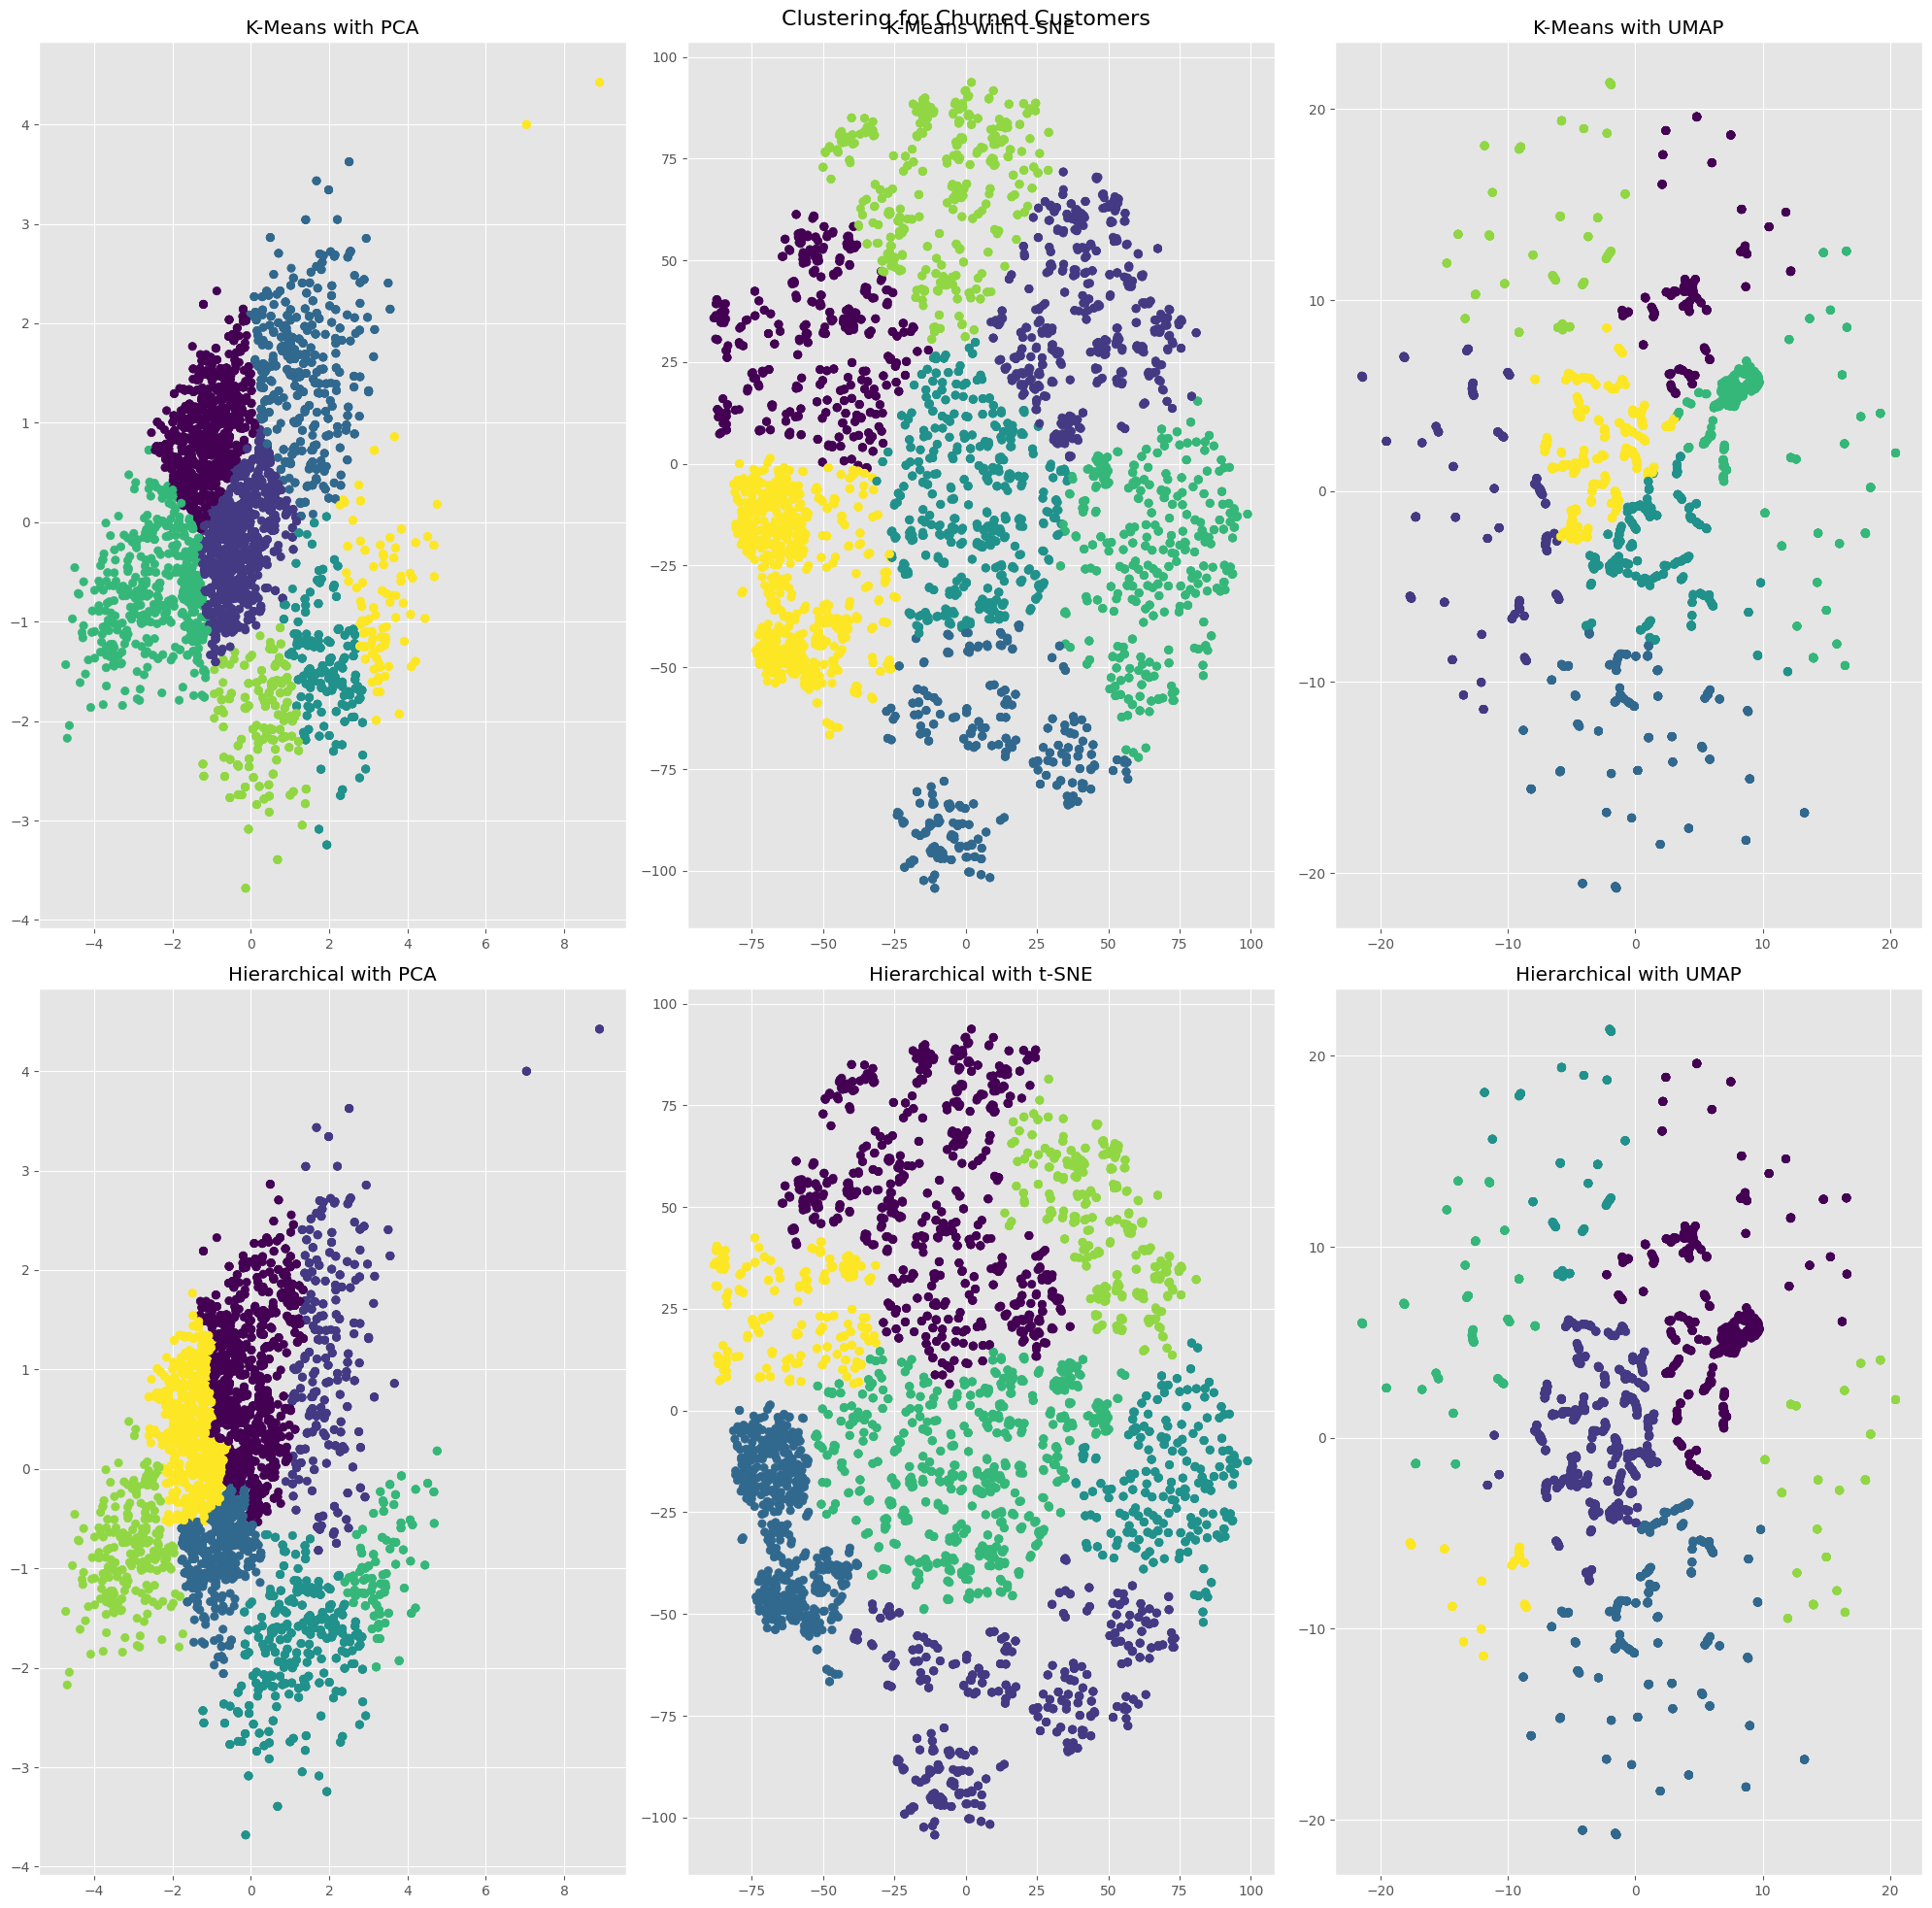

In [101]:
perform_clustering(churn_true_std[numeric_cols], 'Clustering for Churned Customers')

# Final clustering choice

In [85]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


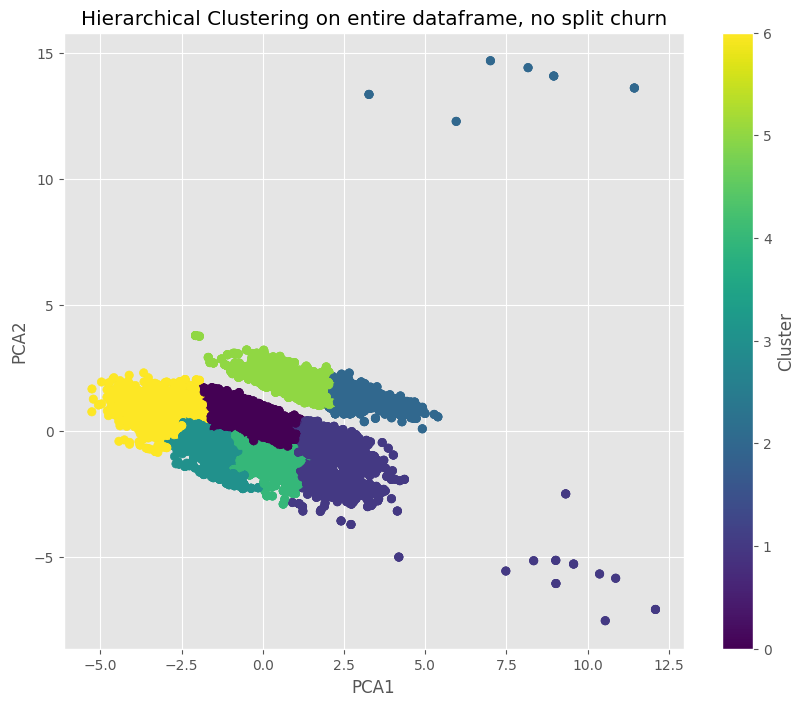

In [86]:
# PCA remains the same
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_standardized[numeric_cols])

# Hierarchical Clustering
optimal_clusters = 7
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
cluster_labels = hierarchical.fit_predict(pca_results)

df['Cluster'] = cluster_labels

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1], c=cluster_labels, cmap='viridis')

# Add title and labels
plt.title('Hierarchical Clustering on entire dataframe, no split churn')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Add a color bar
plt.colorbar(scatter, label='Cluster')

# Note: Hierarchical clustering doesn't have centroids, so we remove that part

# Show the plot
plt.show()

In [87]:
df.head()

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
0     382-4657             128             25     265.1        110   
1     371-7191             107             26     161.6        123   
2     358-1921             137              0     243.4        114   
3     330-6626              75              0     166.7        113   
4     391-8027             118              0     223.4         98   

   Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       28.34     148.3        122       12.61       186.9          121   
4       37.98     220.6        101       18.75       203.9          118   

   Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  \
0         11.01       10.0           3         2.70               1  False   
1         11.45       13.7           3         3.70               1  False   
2          7.32       12.2           5         3.29               0  False   
3          8.41       10.1           3         2.73               3  False   
4          9.18        6.3           6         1.70               0  False   

   Cluster  
0        3  
1        6  
2        6  
3        6  
4        3

/tmp/ipykernel_74/3786589398.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_false['Cluster'] = cluster_labels


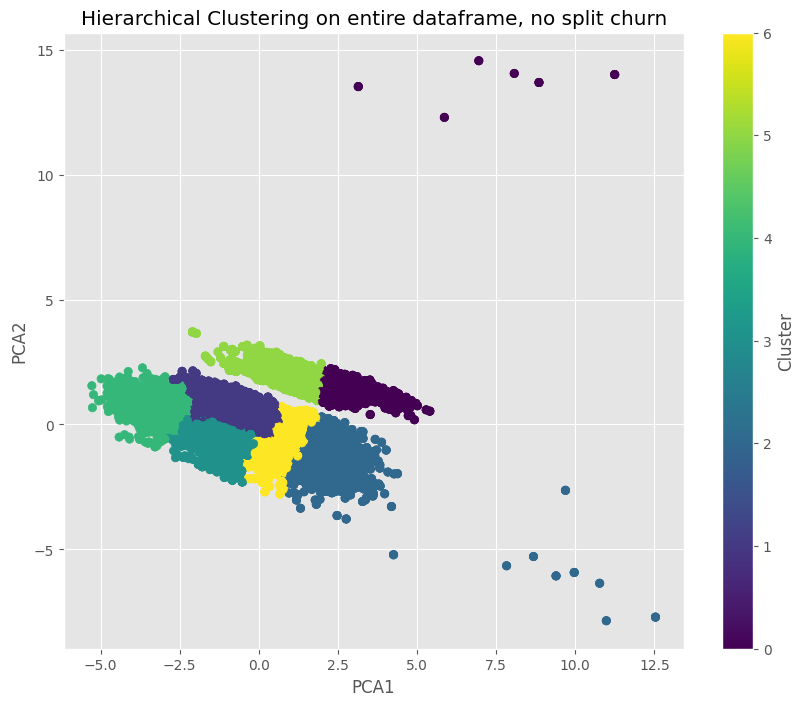

In [88]:
# PCA remains the same
pca = PCA(n_components=2)
pca_results = pca.fit_transform(churn_false_std[numeric_cols])

# Hierarchical Clustering
optimal_clusters = 7
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
cluster_labels = hierarchical.fit_predict(pca_results)

churn_false['Cluster'] = cluster_labels

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1], c=cluster_labels, cmap='viridis')

# Add title and labels
plt.title('Hierarchical Clustering on entire dataframe, no split churn')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Add a color bar
plt.colorbar(scatter, label='Cluster')

# Note: Hierarchical clustering doesn't have centroids, so we remove that part

# Show the plot
plt.show()

In [89]:
churn_false.head()

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
0     382-4657             128             25     265.1        110   
1     371-7191             107             26     161.6        123   
2     358-1921             137              0     243.4        114   
3     330-6626              75              0     166.7        113   
4     391-8027             118              0     223.4         98   

   Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       28.34     148.3        122       12.61       186.9          121   
4       37.98     220.6        101       18.75       203.9          118   

   Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  \
0         11.01       10.0           3         2.70               1  False   
1         11.45       13.7           3         3.70               1  False   
2          7.32       12.2           5         3.29               0  False   
3          8.41       10.1           3         2.73               3  False   
4          9.18        6.3           6         1.70               0  False   

   Cluster  
0        3  
1        1  
2        4  
3        4  
4        3

/tmp/ipykernel_74/1582120305.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_true['Cluster'] = cluster_labels


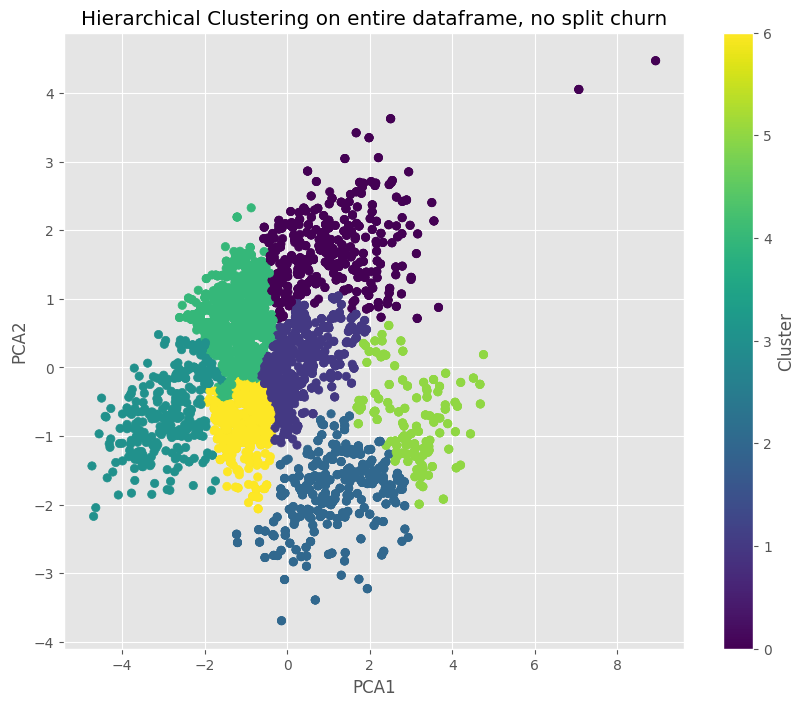

In [90]:
# PCA remains the same
pca = PCA(n_components=2)
pca_results = pca.fit_transform(churn_true_std[numeric_cols])

# Hierarchical Clustering
optimal_clusters = 7
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
cluster_labels = hierarchical.fit_predict(pca_results)

churn_true['Cluster'] = cluster_labels

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1], c=cluster_labels, cmap='viridis')

# Add title and labels
plt.title('Hierarchical Clustering on entire dataframe, no split churn')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Add a color bar
plt.colorbar(scatter, label='Cluster')

# Note: Hierarchical clustering doesn't have centroids, so we remove that part

# Show the plot
plt.show()

In [91]:
churn_true.head()

Phone_Number  Account_Length  VMail_Message  Day_Mins  Day_Calls  \
8      329-6603              65              0     129.1        137   
12     351-7269             161              0     332.9         67   
17     393-7984              77              0      62.4         89   
26     360-1596              12              0     249.6        118   
39     398-1294             119              0     159.1        114   

    Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
8        21.95     228.5         83       19.42       208.8          111   
12       56.59     317.8         97       27.01       160.6          128   
17       10.61     169.9        121       14.44       209.6           64   
26       42.43     252.4        119       21.45       280.2           90   
39       27.05     231.3        117       19.66       143.2           91   

    Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  \
8           9.40       12.7           6         3.43               4   True   
12          7.23        5.4           9         1.46               4   True   
17          9.43        5.7           6         1.54               5   True   
26         12.61       11.8           3         3.19               1   True   
39          6.44        8.8           3         2.38               5   True   

    Cluster  
8         3  
12        0  
17        3  
26        4  
39        3